# Adding Noise to Perfect Data

### Imports

In [1]:
import random
from typing import List, Dict
from statistics import mean, stdev
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation, patches
import numpy as np
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from sklearn import preprocessing
from IPython.display import HTML, Image
from scipy.stats import norm

matplotlib.rcParams["animation.embed_limit"] = 2**128
matplotlib.rcParams["figure.dpi"] = 300

### Generating Data

In [46]:
from random import randint, shuffle

samples = 1000

def generate_random_values():
    return [randint(0,50) * randint(0,50) for _ in range(samples)]

ms = [2 for _ in range(samples)]
xs = generate_random_values()
cs = [50 for _ in range(samples)]

ys = []
for i in range(samples):
    y = ms[i] * xs[i] + cs[i]
    ys.append(y)
noise = [random.randint(0,100) for _ in range(samples)]

data = {
    "ms": ms,
    "xs": xs,
    "cs": cs,
    "noise": noise, 
    "ys": ys
}

df = pd.DataFrame(data=data)
test = df.head(5)
test

,ms,xs,cs,noise,ys
0,2,576,50,28,1202
1,2,0,50,73,50
2,2,10,50,24,70
3,2,240,50,47,530
4,2,640,50,92,1330


In [47]:
columns = ["ms", "xs", "cs", "noise"]
all_columns = columns + ["ys"]
X_train = df[columns]
y_train = df["ys"]

### Defining Model

In [48]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=4, input_shape=[4]))
model.add(tf.keras.layers.Dense(units=1))
model.summary()
opt = Adam(0.01)
model.compile(optimizer=opt, loss="mean_squared_error")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


### Data Structure to Capture Weights During Trianing

In [2]:
def create_history(columns: int, nodes: int) -> Dict:
    history = {i:{j: [] for j in range(nodes)} for i in range(columns)}
    history["loss"] = []
    return history

In [4]:
history = create_history(4, 4)

### Training Model and Capturing Weights

In [50]:
for epoch in range(1, 501):
    print(f"RUNNING EPOCH {epoch}")
    hist = model.fit(X_train, y_train, epochs=1)
    history["loss"].append(hist.history["loss"])
    all_weights = model.layers[0].get_weights()[0].tolist()
    for weights in range(len(all_weights)):
        for weight in range(len(all_weights[weights])):
            history[weights][weight].append(all_weights[weights][weight])

RUNNING EPOCH 1
32/32 [==============================] - 0s 5ms/step - loss: 6055762.5000
RUNNING EPOCH 2
32/32 [==============================] - 0s 5ms/step - loss: 3316066.5000
RUNNING EPOCH 3
32/32 [==============================] - 0s 4ms/step - loss: 1588194.7500
RUNNING EPOCH 4
32/32 [==============================] - 0s 4ms/step - loss: 344714.3125
RUNNING EPOCH 5
32/32 [==============================] - 0s 4ms/step - loss: 34749.5391
RUNNING EPOCH 6
32/32 [==============================] - 0s 5ms/step - loss: 23497.6562
RUNNING EPOCH 7
32/32 [==============================] - 0s 5ms/step - loss: 19726.9512
RUNNING EPOCH 8
32/32 [==============================] - 0s 5ms/step - loss: 16482.7129
RUNNING EPOCH 9
32/32 [==============================] - 0s 5ms/step - loss: 13608.2881
RUNNING EPOCH 10
32/32 [==============================] - 0s 5ms/step - loss: 11084.5186
RUNNING EPOCH 11
32/32 [==============================] - 0s 5ms/step - loss: 8902.3916
RUNNING EPOCH 12
32/32 [

### Sense Checking Results

In [51]:
test["result"] = model.predict(test[columns])
test

1/1 [==============================] - 0s 33ms/step


<ipython-input-51-a54c478e00da>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["result"] = model.predict(test[columns])


,ms,xs,cs,noise,ys,result
0,2,576,50,28,1202,1202.000244
1,2,0,50,73,50,50.000088
2,2,10,50,24,70,70.000031
3,2,240,50,47,530,530.000000
4,2,640,50,92,1330,1330.000122


### Colours

In [52]:
light = "#90CCF4"
darker = "#5DA2D5"
important = "#F3D250"
noise = "#F78888"
other = "#ECECEC"

### Animated Bar Graph

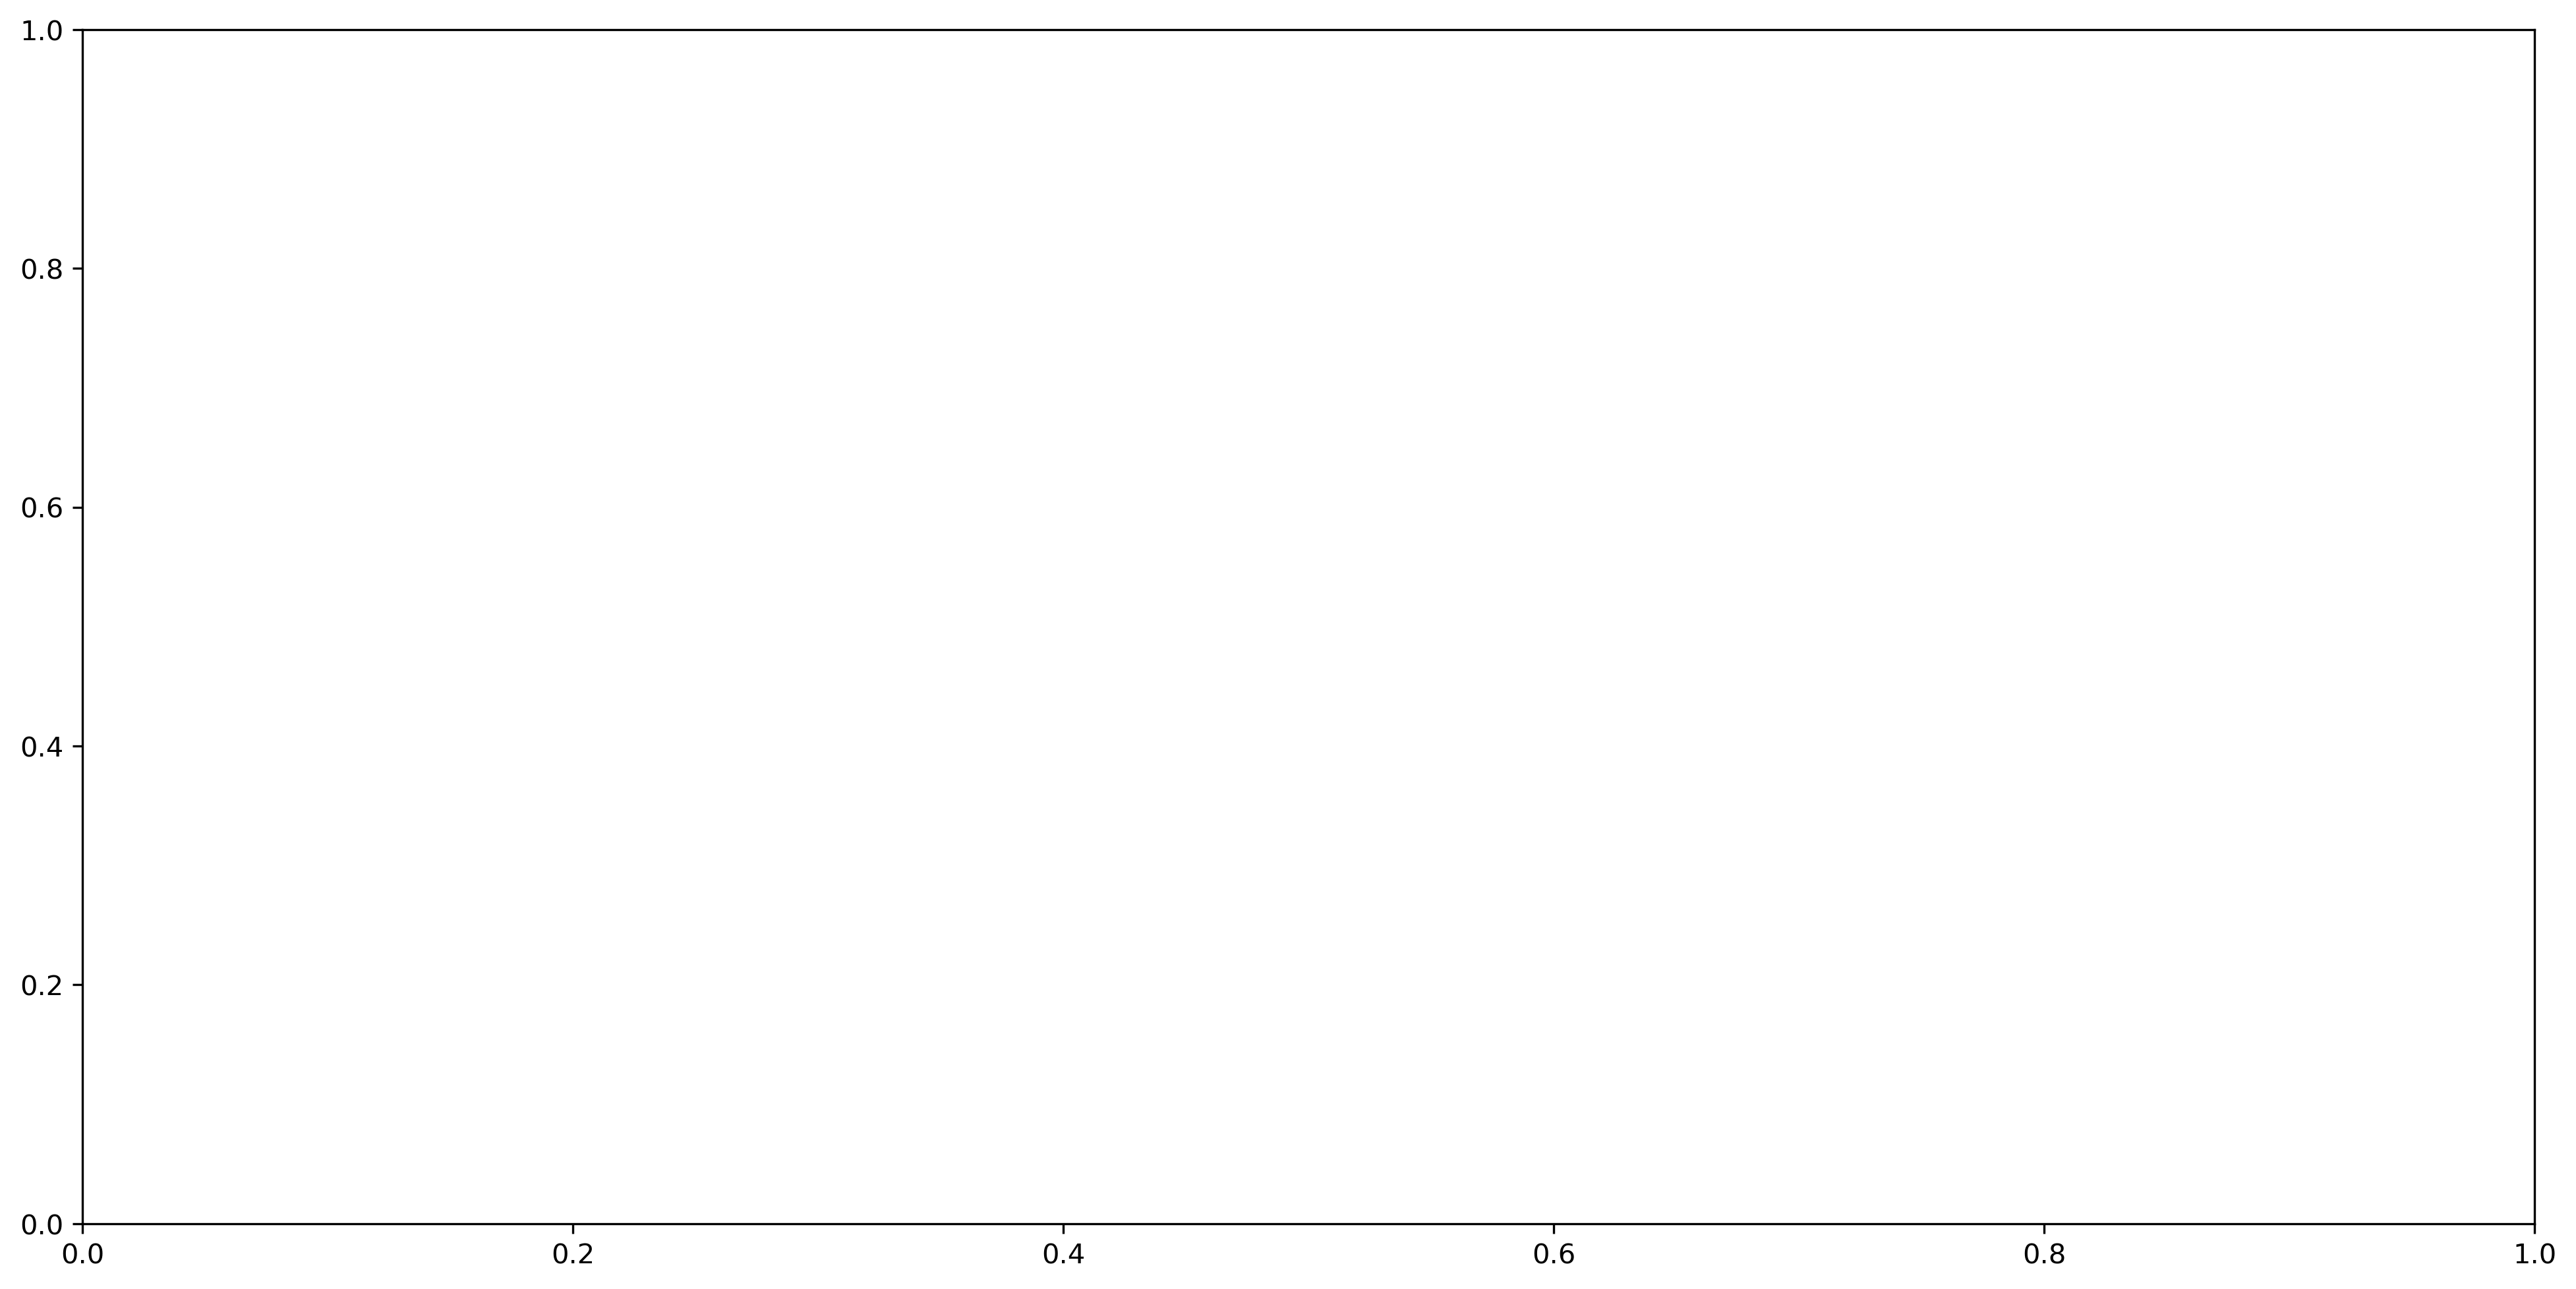

In [53]:
frames = 500
fig, ax = plt.subplots(figsize=(16,8))

In [54]:
def run(i):
  ax.cla()
  ax.set_xlabel("Input Column and Node Number")
  ax.set_ylabel("Weight")
  ax.set_ylim(-1.5, 1.5)
  m_one = history[0][0][i]
  m_two = history[0][1][i]
  m_three = history[0][2][i]
  m_four = history[0][3][i]
  
  x_one = history[1][0][i]
  x_two = history[1][1][i]
  x_three = history[1][2][i]
  x_four = history[1][3][i]

  c_one = history[2][0][i]
  c_two = history[2][1][i]
  c_three = history[2][2][i]
  c_four = history[2][3][i]

  noise_one = history[3][0][i]
  noise_two = history[3][1][i]
  noise_three = history[3][2][i]
  noise_four = history[3][3][i]
  ax.bar(
    [
      "M1", "M2", "M3", "M4", 
      "X1", "X2", "X3", "X4", 
      "C1", "C2", "C3", "C4", 
      "Noise 1", "Noise 2", "Noise 3", "Noise 4", 
    ],
    [
      m_one, m_two, m_three, m_four,
      x_one, x_two, x_three, x_four,
      c_one, c_two, c_three, c_four,
      noise_two, noise_two, noise_three, noise_four,
    ],
    color=[
      darker, darker, darker, darker,
      important, important, important, important,
      light, light, light, light, 
      noise, noise, noise, noise
    ]
  )


In [55]:
# anim = animation.FuncAnimation(fig, run, frames=frames, interval=50)
# HTML(anim.to_html5_video())

### Useful Data Set

In [98]:
start_index = 0
NODES = 4

def get_groups(index: int, nodes: int) -> List:
    group = []
    for i in range(nodes):
        group.append(history[index][i][start_index:])
    return group

In [100]:
ms = get_groups(0, NODES)
xs = get_groups(1, NODES)
cs = get_groups(2, NODES)
noises = get_groups(3, NODES)

### Box Plots

In [57]:
def generate_box_plot(ax, data: List, color: str, label: str, position_offset: int = 0, showfliers: bool = False):
    ax.set_xlabel("Input Column and Node Number")
    ax.set_ylabel("Weight Values")
    color = {"color": color}
    ax.boxplot(
        data,
        positions=[i + position_offset for i in range(1,5)],
        boxprops=color,
        medianprops=color,
        whiskerprops=color,
        capprops=color,
        flierprops={"markeredgecolor": other},
        showfliers=showfliers,
        labels=[f"{label}{i}" for i in range(1,5)]
    )

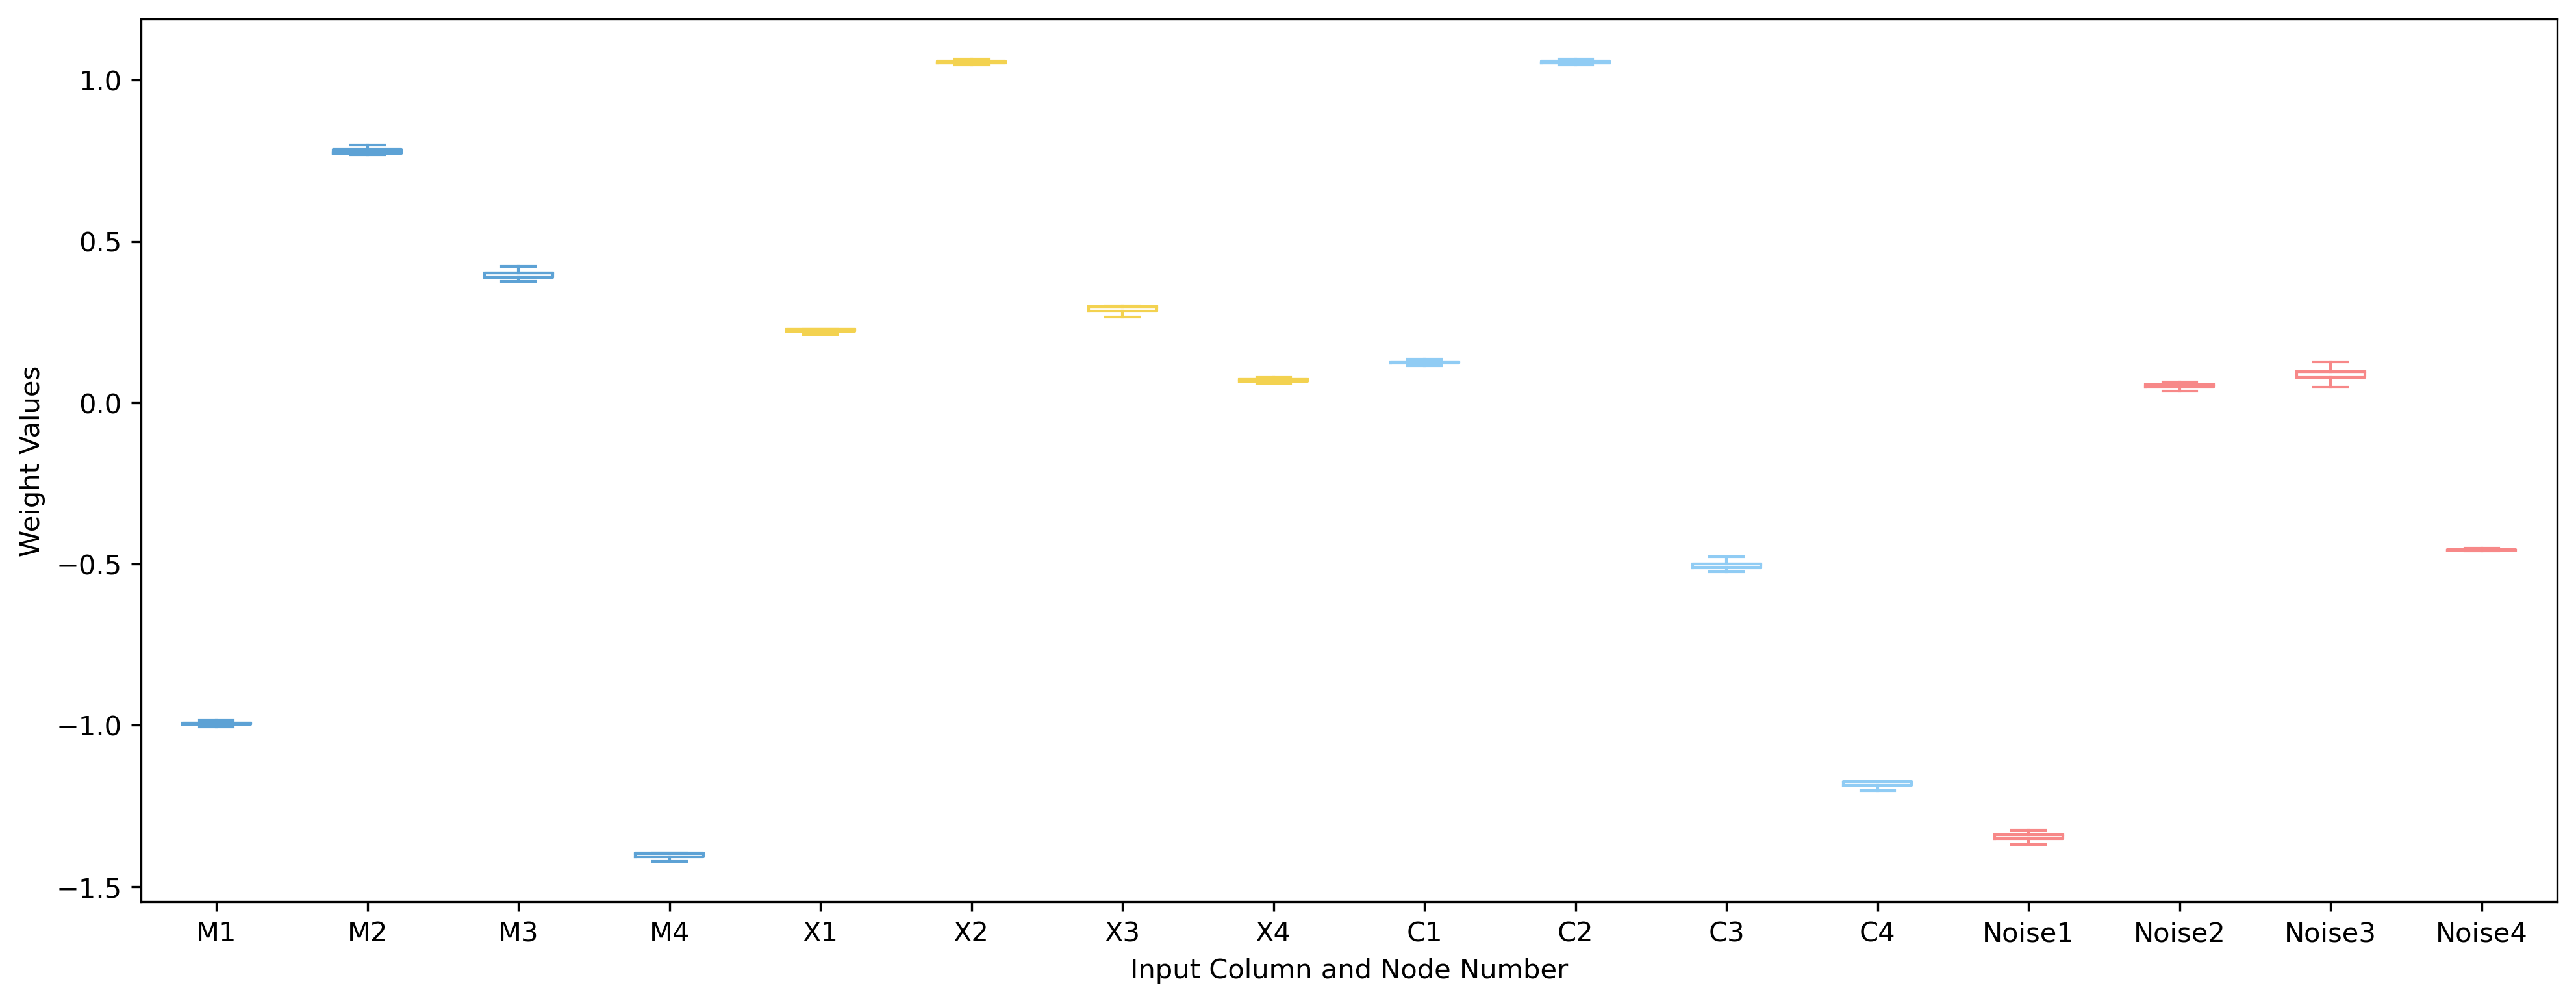

In [58]:
fig, ax = plt.subplots(figsize=(16,6))

generate_box_plot(ax, ms, darker, "M")
generate_box_plot(ax, xs, important, "X", 4)
generate_box_plot(ax, cs, light, "C", 8)
generate_box_plot(ax, noises, noise, "Noise", 12)


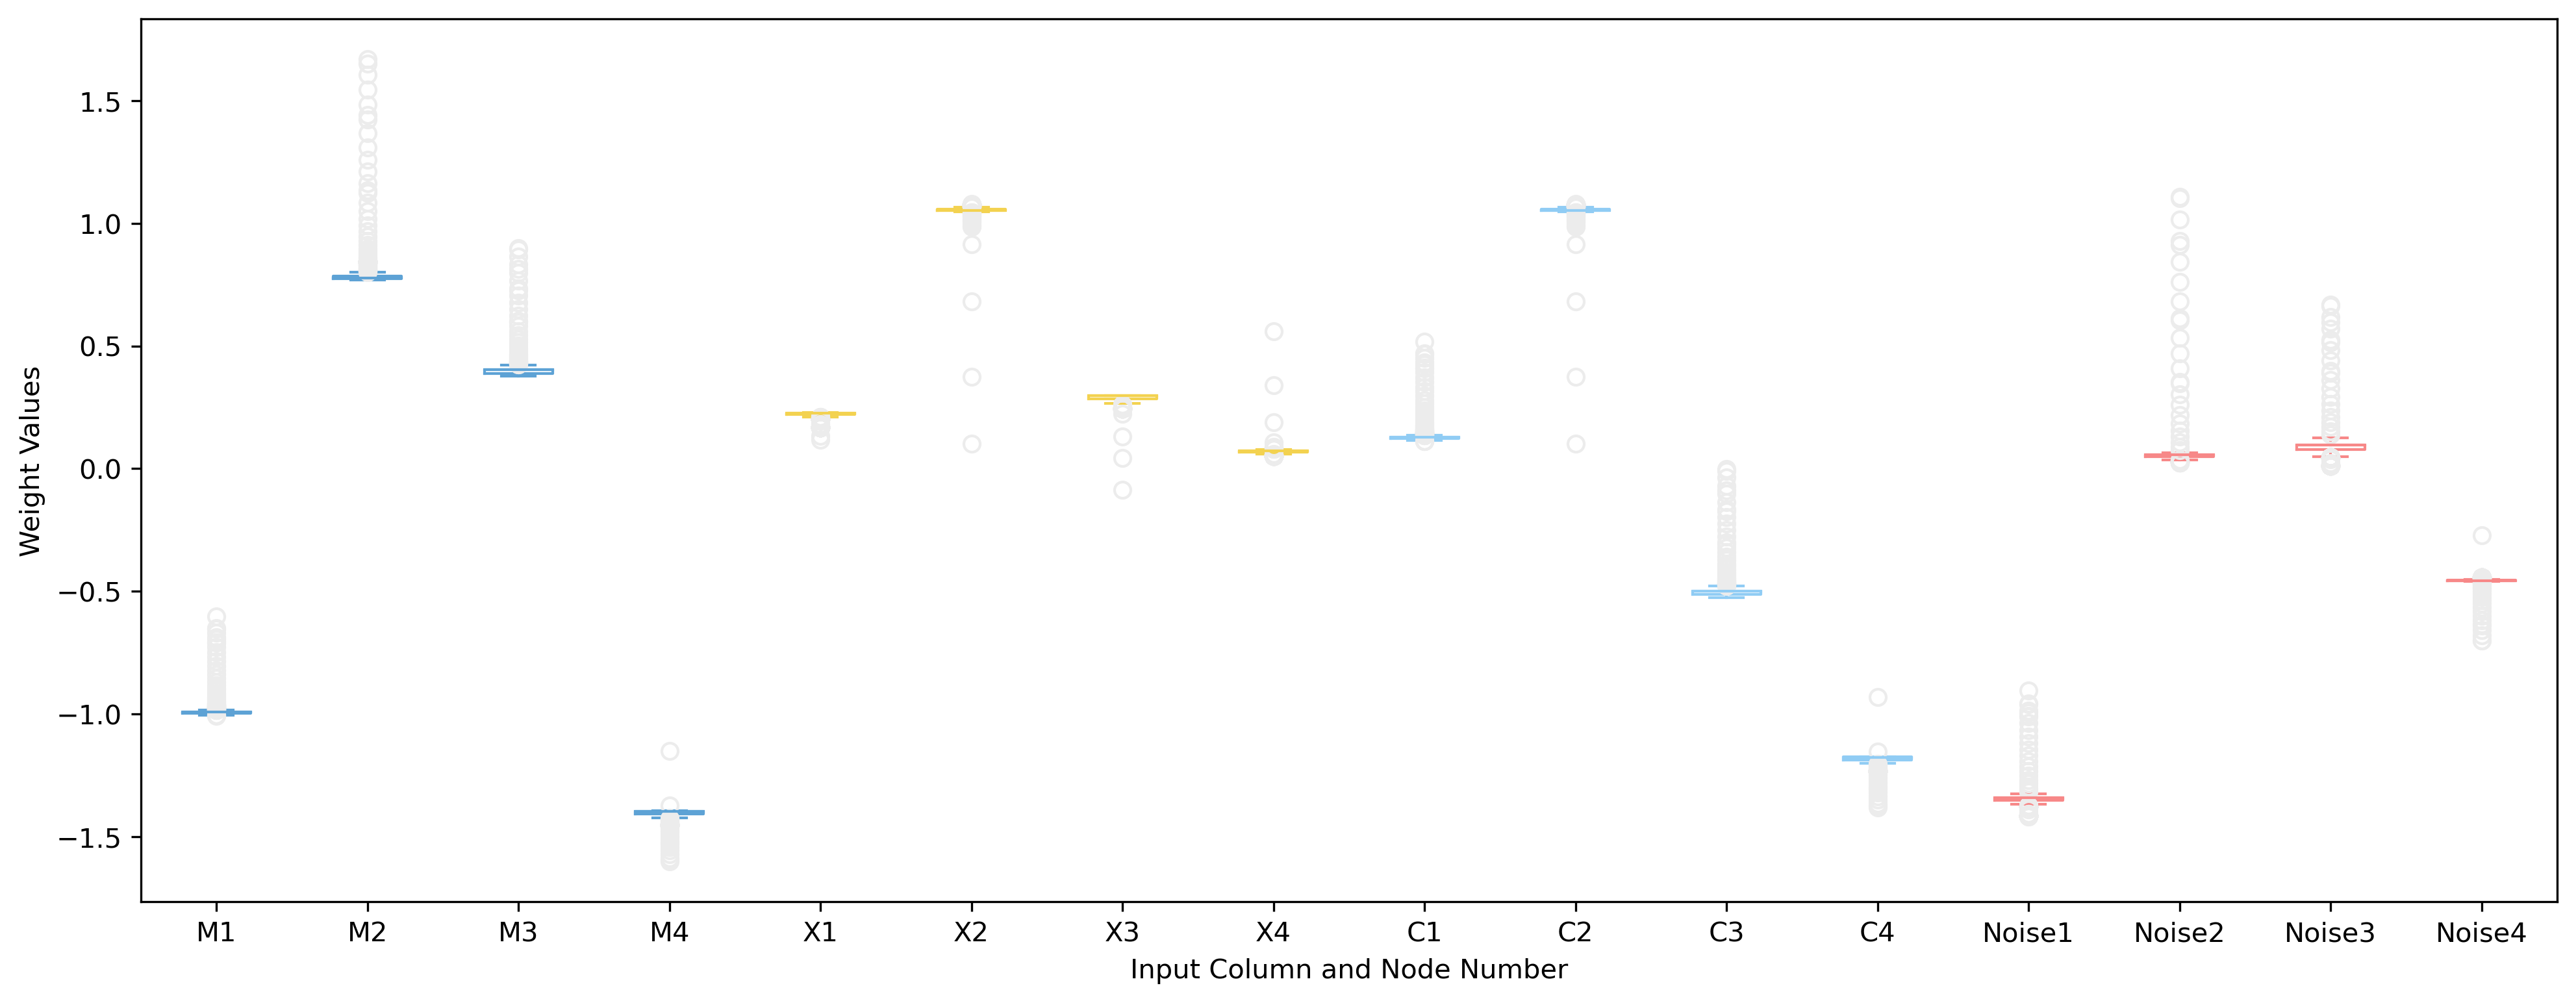

In [59]:
fig, ax = plt.subplots(figsize=(16,6))

generate_box_plot(ax, ms, darker, "M", showfliers=True)
generate_box_plot(ax, xs, important, "X", 4, showfliers=True)
generate_box_plot(ax, cs, light, "C", 8, showfliers=True)
generate_box_plot(ax, noises, noise, "Noise", 12, showfliers=True)

### Standard Deviation Etc.

In [60]:
data = {
    "m_one": m_one,
    "m_two": m_two,
    "m_three": m_three,
    "m_four": m_four,
    "x_one": x_one,
    "x_two": x_two,
    "x_three": x_three,
    "x_four": x_four,
    "c_one": c_one,
    "c_two": c_two,
    "c_three": c_three,
    "c_four": c_four,
    "noise_one": noise_one,
    "noise_two": noise_two,
    "noise_three": noise_three,
    "noise_four": noise_four
}

columns = [
    "m_one",
    "m_two",
    "m_three",
    "m_four",
    "x_one",
    "x_two",
    "x_three",
    "x_four",
    "c_one",
    "c_two",
    "c_three",
    "c_four",
    "noise_one",
    "noise_two",
    "noise_three",
    "noise_four"
]


odf = pd.DataFrame(data)
odf.head(5)

,m_one,m_two,m_three,m_four,x_one,x_two,x_three,x_four,c_one,c_two,c_three,c_four,noise_one,noise_two,noise_three,noise_four
0,-0.601341,0.859905,0.595855,-1.151127,0.225215,0.102196,-0.086271,0.558888,0.518103,0.392064,-0.305301,-0.929860,-0.905012,0.347555,0.391077,-0.272644
1,-0.709591,1.134348,0.726902,-1.373309,0.118103,0.373683,0.043781,0.339572,0.409853,0.666507,-0.174254,-1.152043,-1.007326,0.611738,0.514985,-0.486066
2,-0.694896,1.440726,0.812713,-1.523619,0.133824,0.681294,0.131412,0.188368,0.424547,0.972885,-0.088443,-1.302353,-0.993682,0.912323,0.597180,-0.634010
3,-0.653322,1.650751,0.892853,-1.595363,0.182170,0.913317,0.223823,0.108258,0.466122,1.182910,-0.008303,-1.374097,-0.956623,1.106931,0.668975,-0.700376
4,-0.649710,1.669207,0.899652,-1.601577,0.201725,0.986085,0.260275,0.087572,0.469734,1.201366,-0.001504,-1.380311,-0.959322,1.102232,0.663956,-0.700625


In [61]:
m_one_std = odf["m_one"].agg([np.mean, np.std])
m_two_std = odf["m_two"].agg([np.mean, np.std])
m_three_std = odf["m_three"].agg([np.mean, np.std])
m_four_std = odf["m_four"].agg([np.mean, np.std])

noise_one_std = odf["noise_one"].agg([np.mean, np.std])
noise_two_std = odf["noise_two"].agg([np.mean, np.std])
noise_three_std = odf["noise_three"].agg([np.mean, np.std])
noise_four_std = odf["noise_four"].agg([np.mean, np.std])


In [62]:
std_df = odf.std().to_frame()
mean_df = odf.mean().to_frame()
std_df.columns = ["Std"]
mean_df.columns = ["Mean"]
merged_df = pd.merge(std_df, mean_df, left_index=True, right_index=True)

''

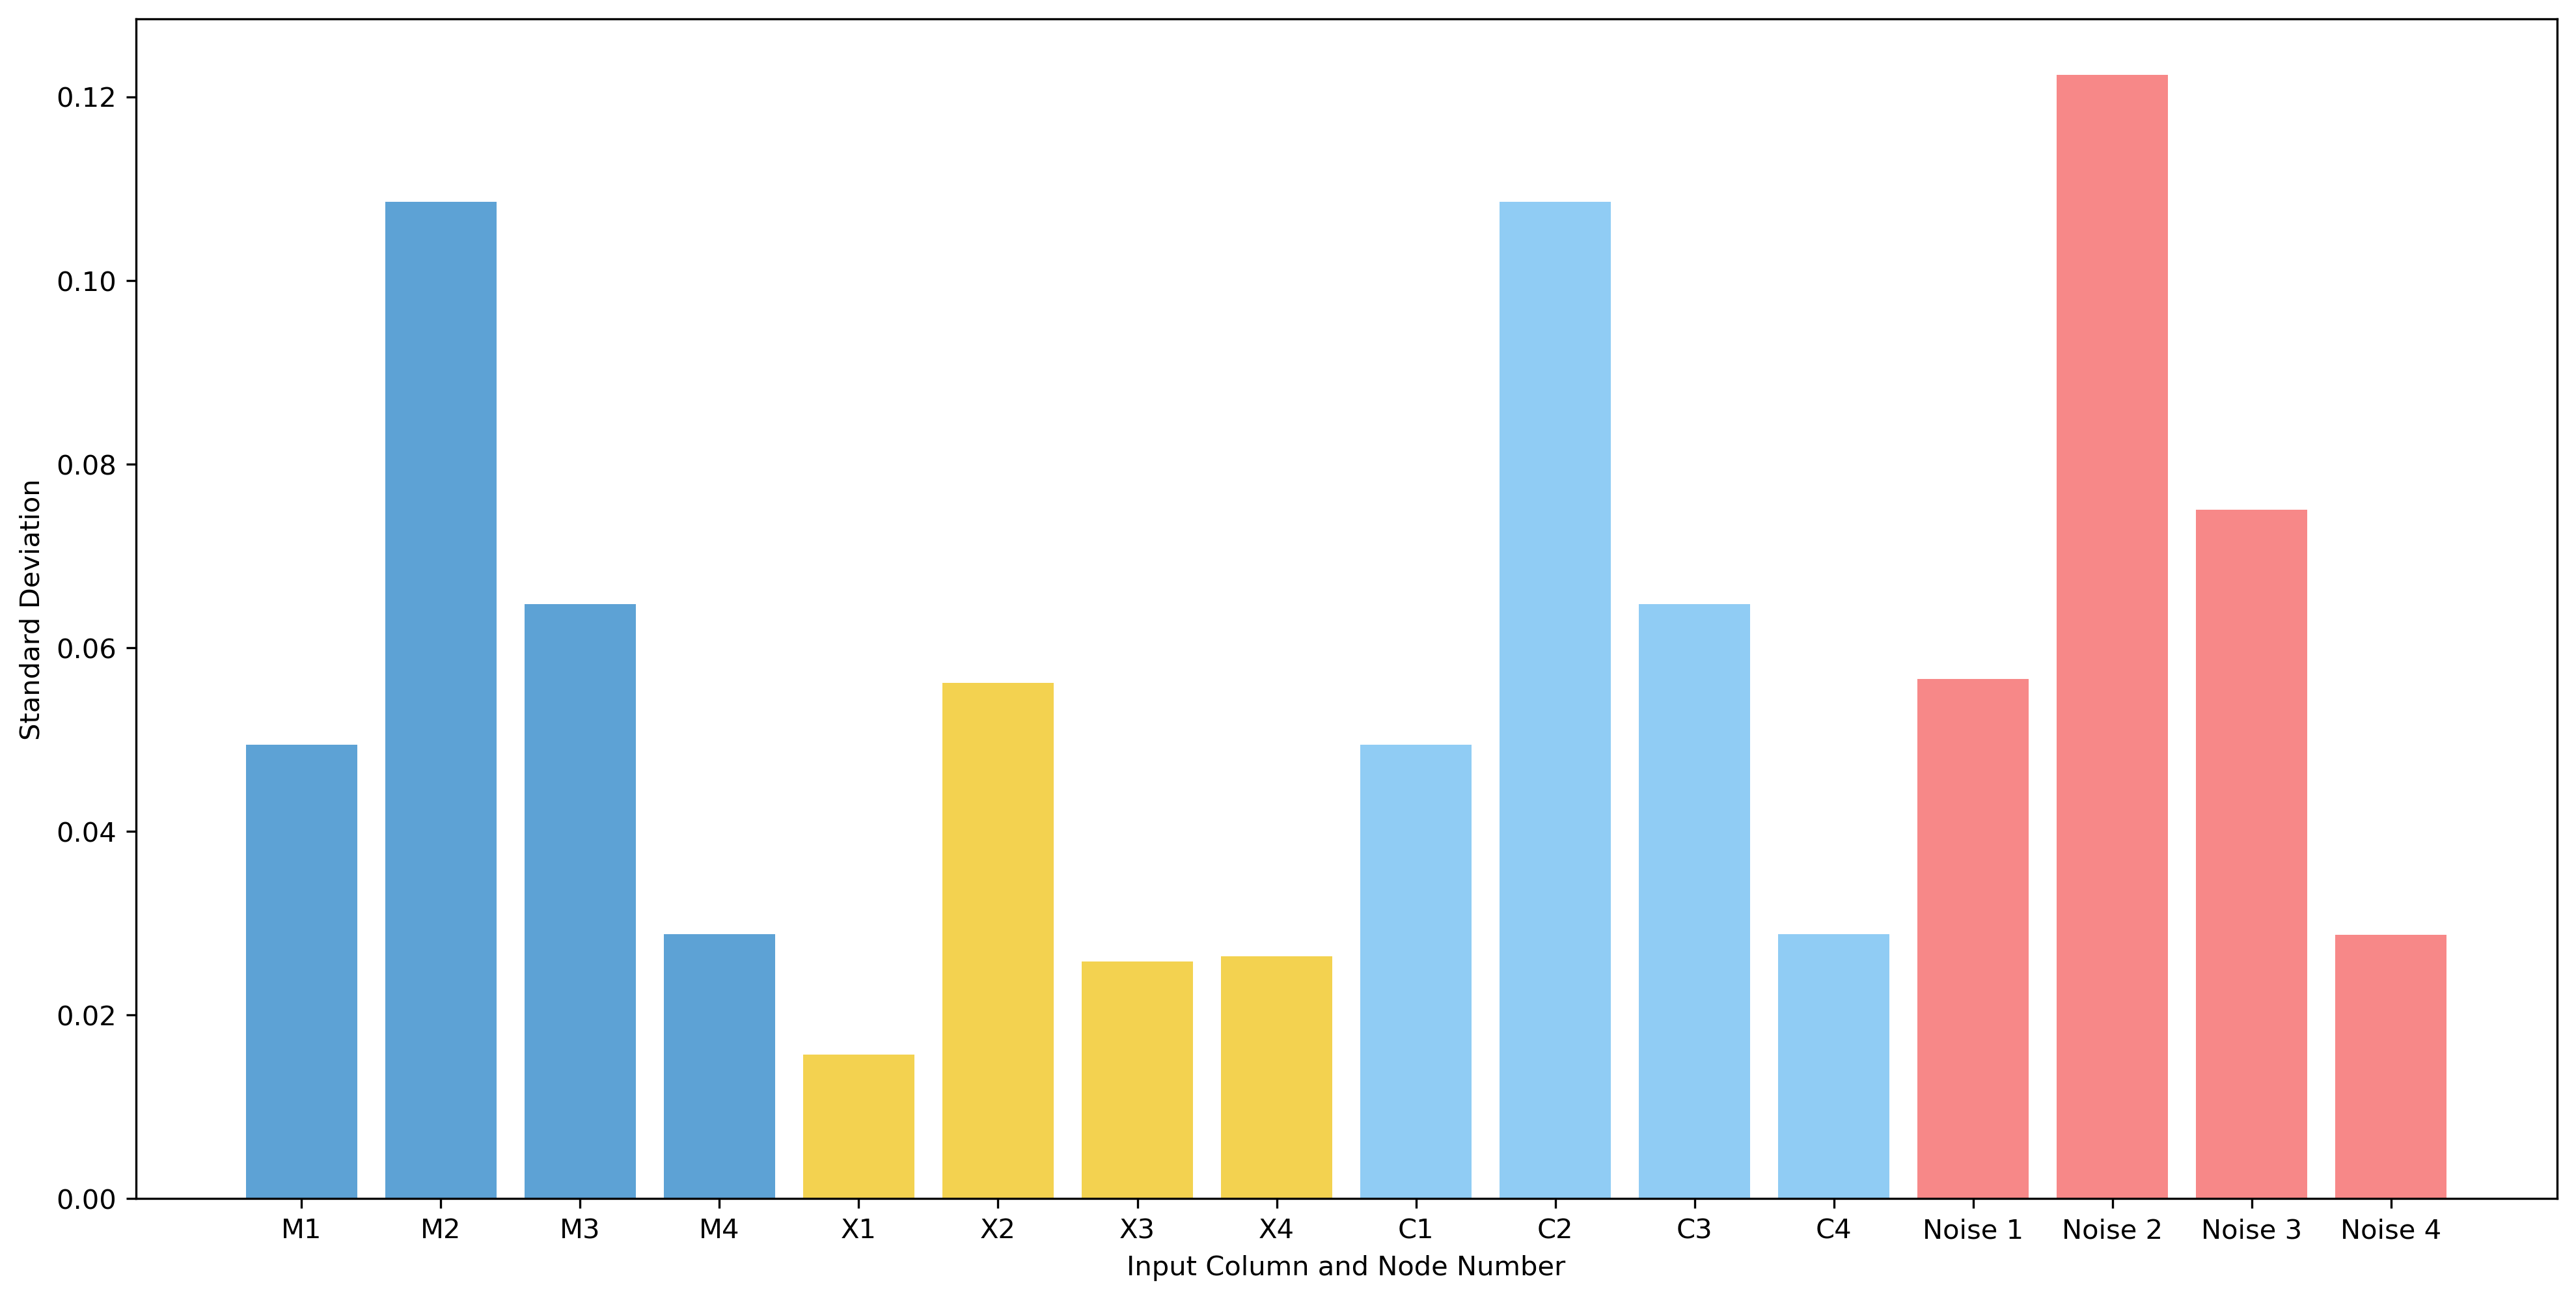

In [63]:
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(
    [
      "M1", "M2", "M3", "M4", 
      "X1", "X2", "X3", "X4", 
      "C1", "C2", "C3", "C4", 
      "Noise 1", "Noise 2", "Noise 3", "Noise 4", 
    ],
    [
      std_df["Std"].loc["m_one"], std_df["Std"].loc["m_two"], std_df["Std"].loc["m_three"], std_df["Std"].loc["m_four"],
      std_df["Std"].loc["x_one"], std_df["Std"].loc["x_two"], std_df["Std"].loc["x_three"], std_df["Std"].loc["x_four"],
      std_df["Std"].loc["c_one"], std_df["Std"].loc["c_two"], std_df["Std"].loc["c_three"], std_df["Std"].loc["c_four"],
      std_df["Std"].loc["noise_one"], std_df["Std"].loc["noise_two"], std_df["Std"].loc["noise_three"], std_df["Std"].loc["noise_four"],
    ],
    color=[
      darker, darker, darker, darker,
      important, important, important, important,
      light, light, light, light,
      noise, noise, noise, noise
    ]
)
ax.set_xlabel("Input Column and Node Number")
ax.set_ylabel("Standard Deviation")
;

In [64]:
g_ms = sum([std_df["Std"].loc["m_one"], std_df["Std"].loc["m_two"], std_df["Std"].loc["m_three"], std_df["Std"].loc["m_four"]])
g_xs = sum([std_df["Std"].loc["x_one"], std_df["Std"].loc["x_two"], std_df["Std"].loc["x_three"], std_df["Std"].loc["x_four"]])
g_cs = sum([std_df["Std"].loc["c_one"], std_df["Std"].loc["c_two"], std_df["Std"].loc["c_three"], std_df["Std"].loc["c_four"]])
g_noises = sum([std_df["Std"].loc["noise_one"], std_df["Std"].loc["noise_two"], std_df["Std"].loc["noise_three"], std_df["Std"].loc["noise_four"]])

''

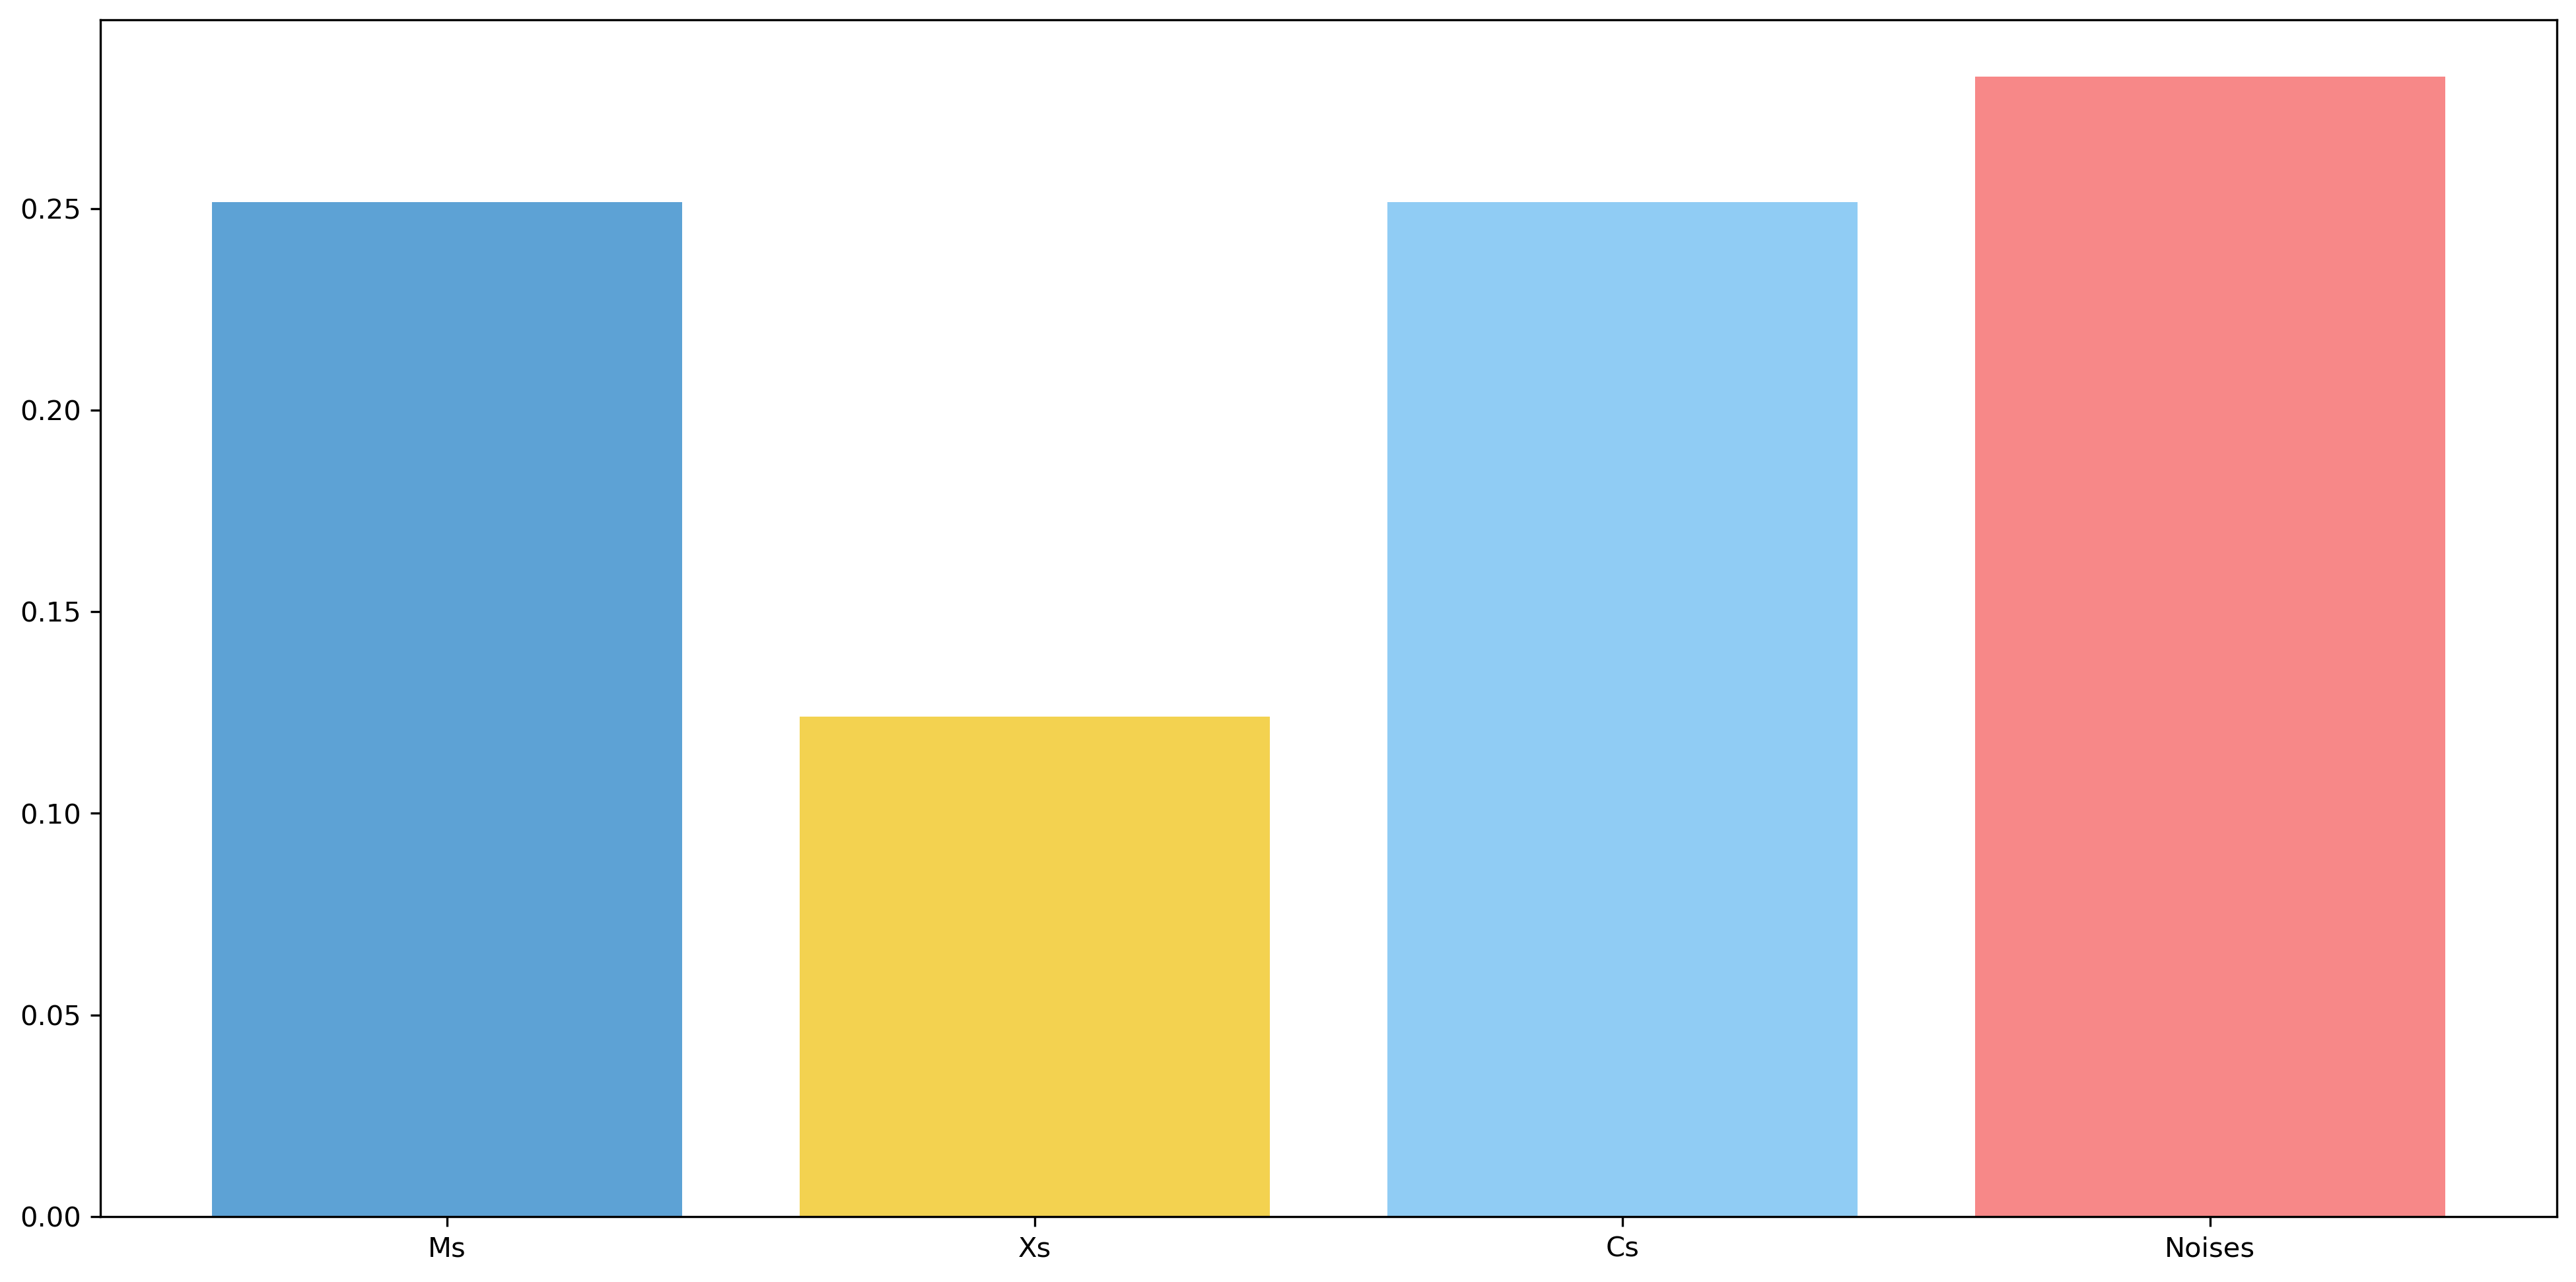

In [65]:
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(
    [
      "Ms", "Xs", "Cs", "Noises"
    ],
    [
      g_ms, g_xs, g_cs, g_noises
    ],
    color=[darker, important, light, noise]
)
;

### Scatter Plots

In [66]:
def prepare_scatter_df(data: List, bin: int, abs: bool = False):
    indices = [i for i in range(len(data))]
    df = pd.DataFrame(indices, columns=["Indices"])
    rdf = pd.DataFrame(data, columns=["Readings"])
    if abs:
        rdf = rdf.explode("Readings", ignore_index=True).abs()
    else:
        rdf = rdf.explode("Readings", ignore_index=True)
    df["Readings"] = rdf["Readings"]
    df["Bin"] = [bin for _ in range(len(data))]
    return df

In [67]:
def call_prepare_scatter_df(data: List, abs: bool = False):
    dfs = []
    for i, item in enumerate(data):
        dfs.append(prepare_scatter_df(item, i, abs))
    return pd.concat(dfs)

In [68]:
def create_scatter(scatter_dfs):
    fig, ax = plt.subplots(figsize=(16,6))
    ax.set_xlabel("Epoch")
    ax.set_ylabel("Weight")
    colormap = np.array([darker, important, light, noise])
    categories = np.array(scatter_dfs["Bin"])
    scatter = ax.scatter(x=scatter_dfs["Indices"], y=scatter_dfs["Readings"], c=colormap[categories], s=[2])

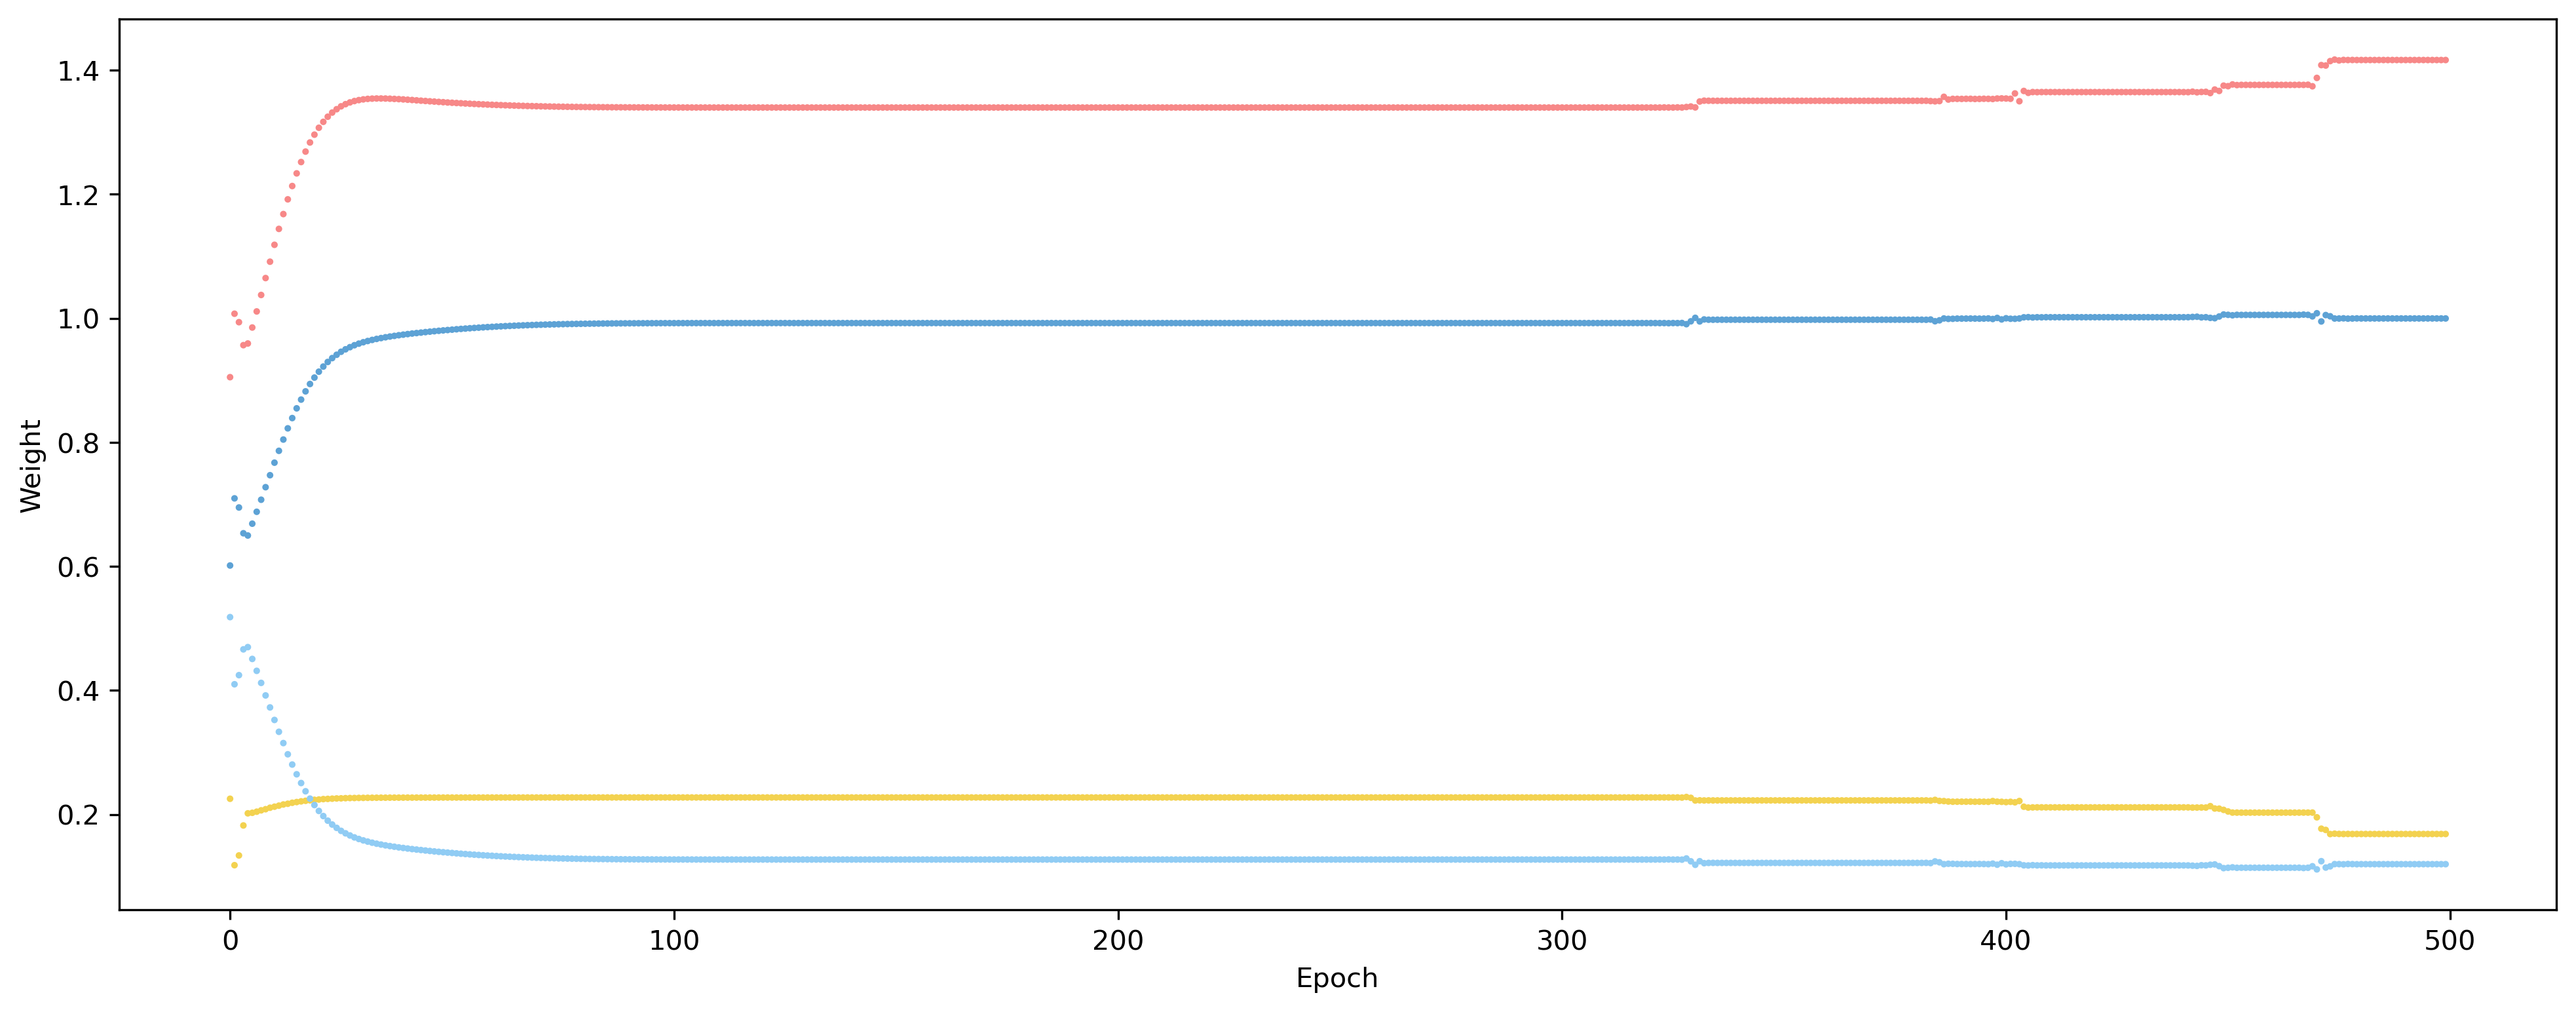

In [69]:
group_ones = [data["m_one"], data["x_one"], data["c_one"], data["noise_one"]]
sdf = call_prepare_scatter_df(group_ones, True)
create_scatter(sdf)

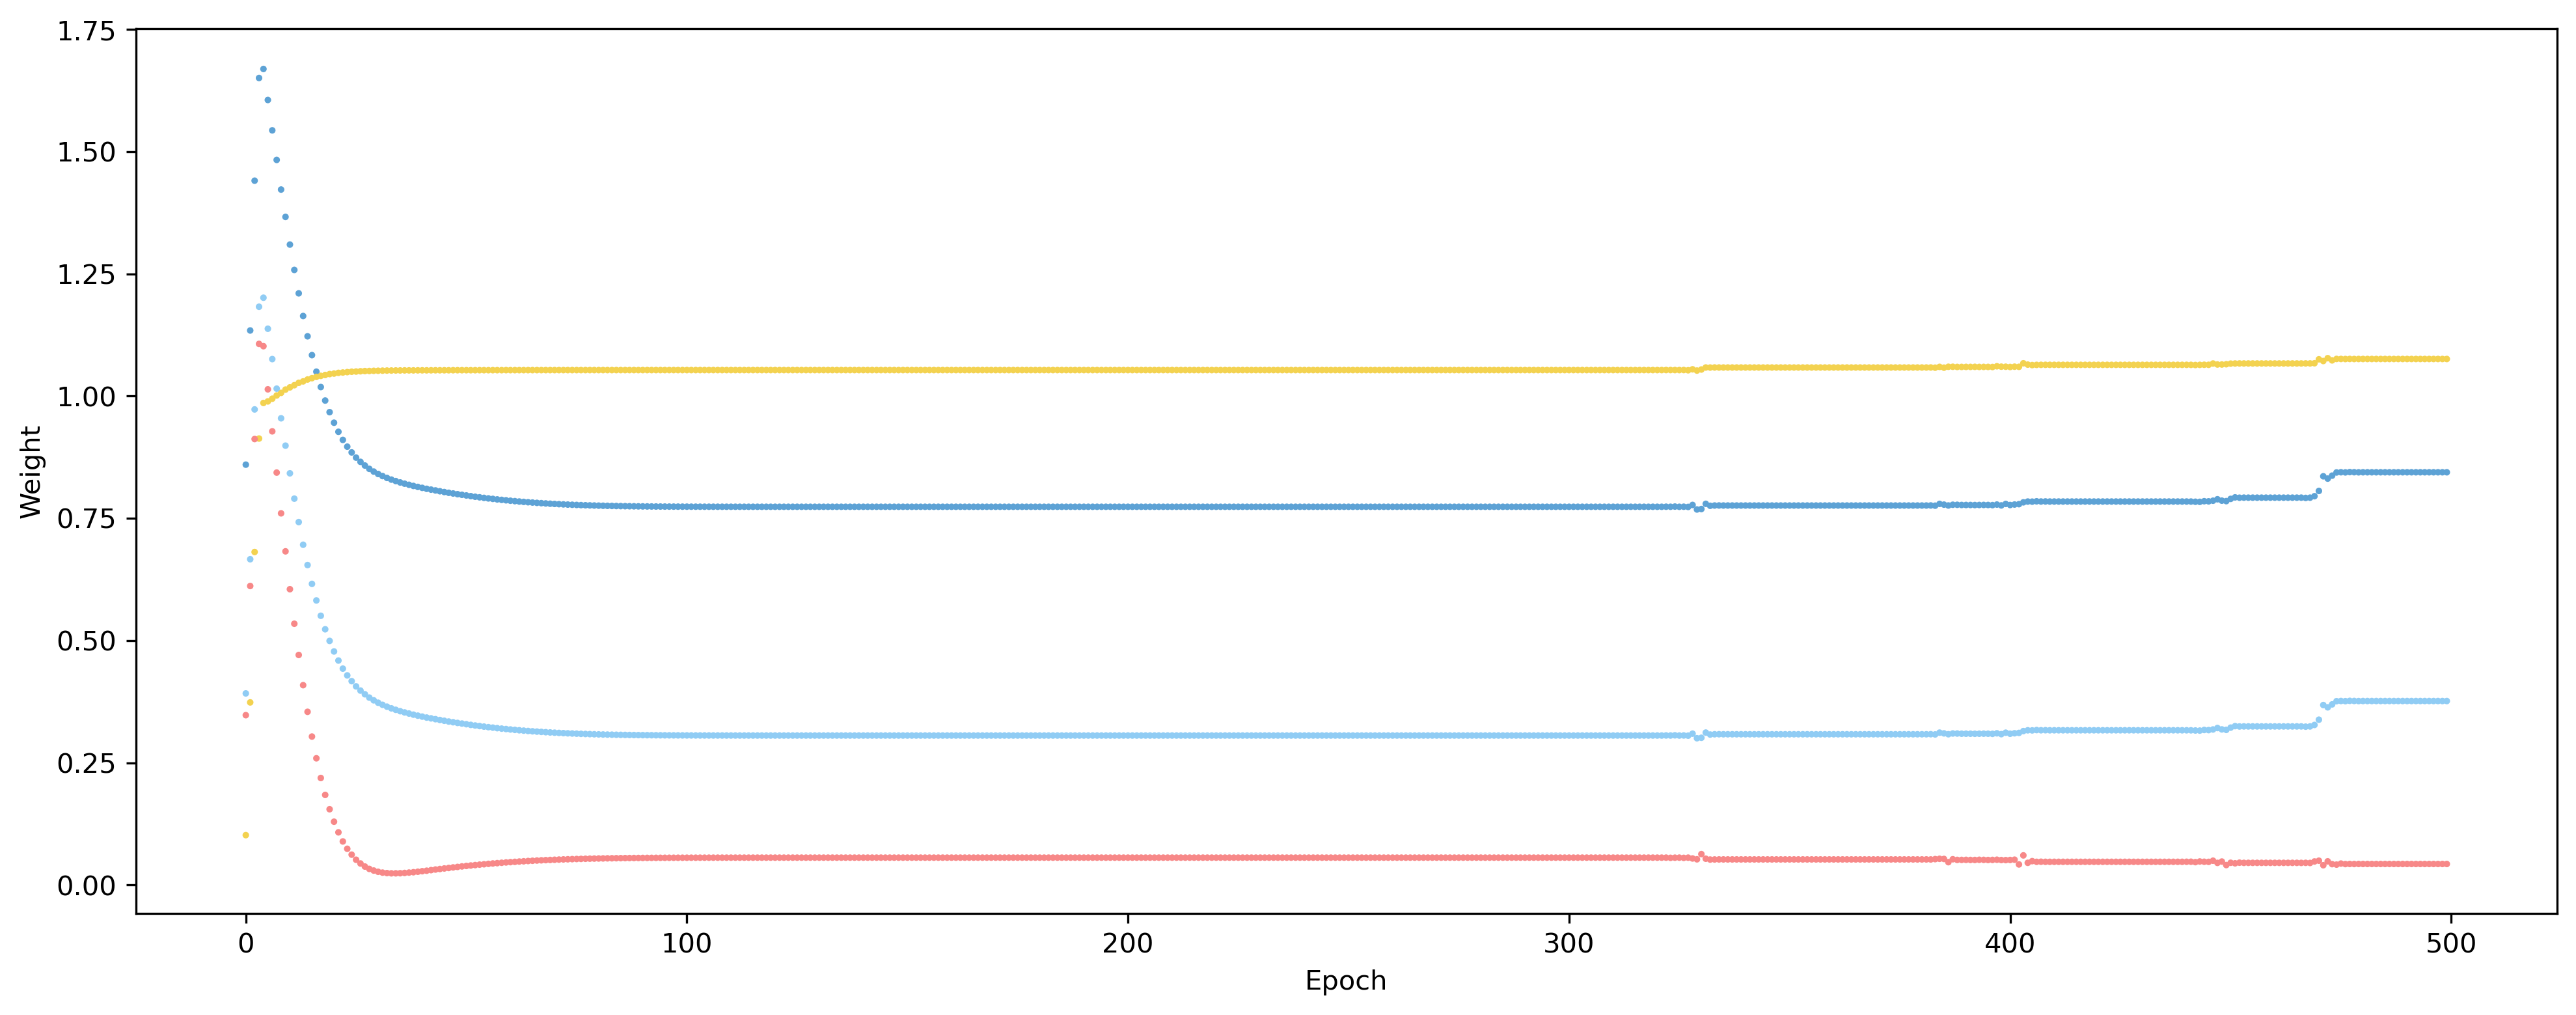

In [70]:
group_twos = [data["m_two"], data["x_two"], data["c_two"], data["noise_two"]]
sdf = call_prepare_scatter_df(group_twos, True)
create_scatter(sdf)

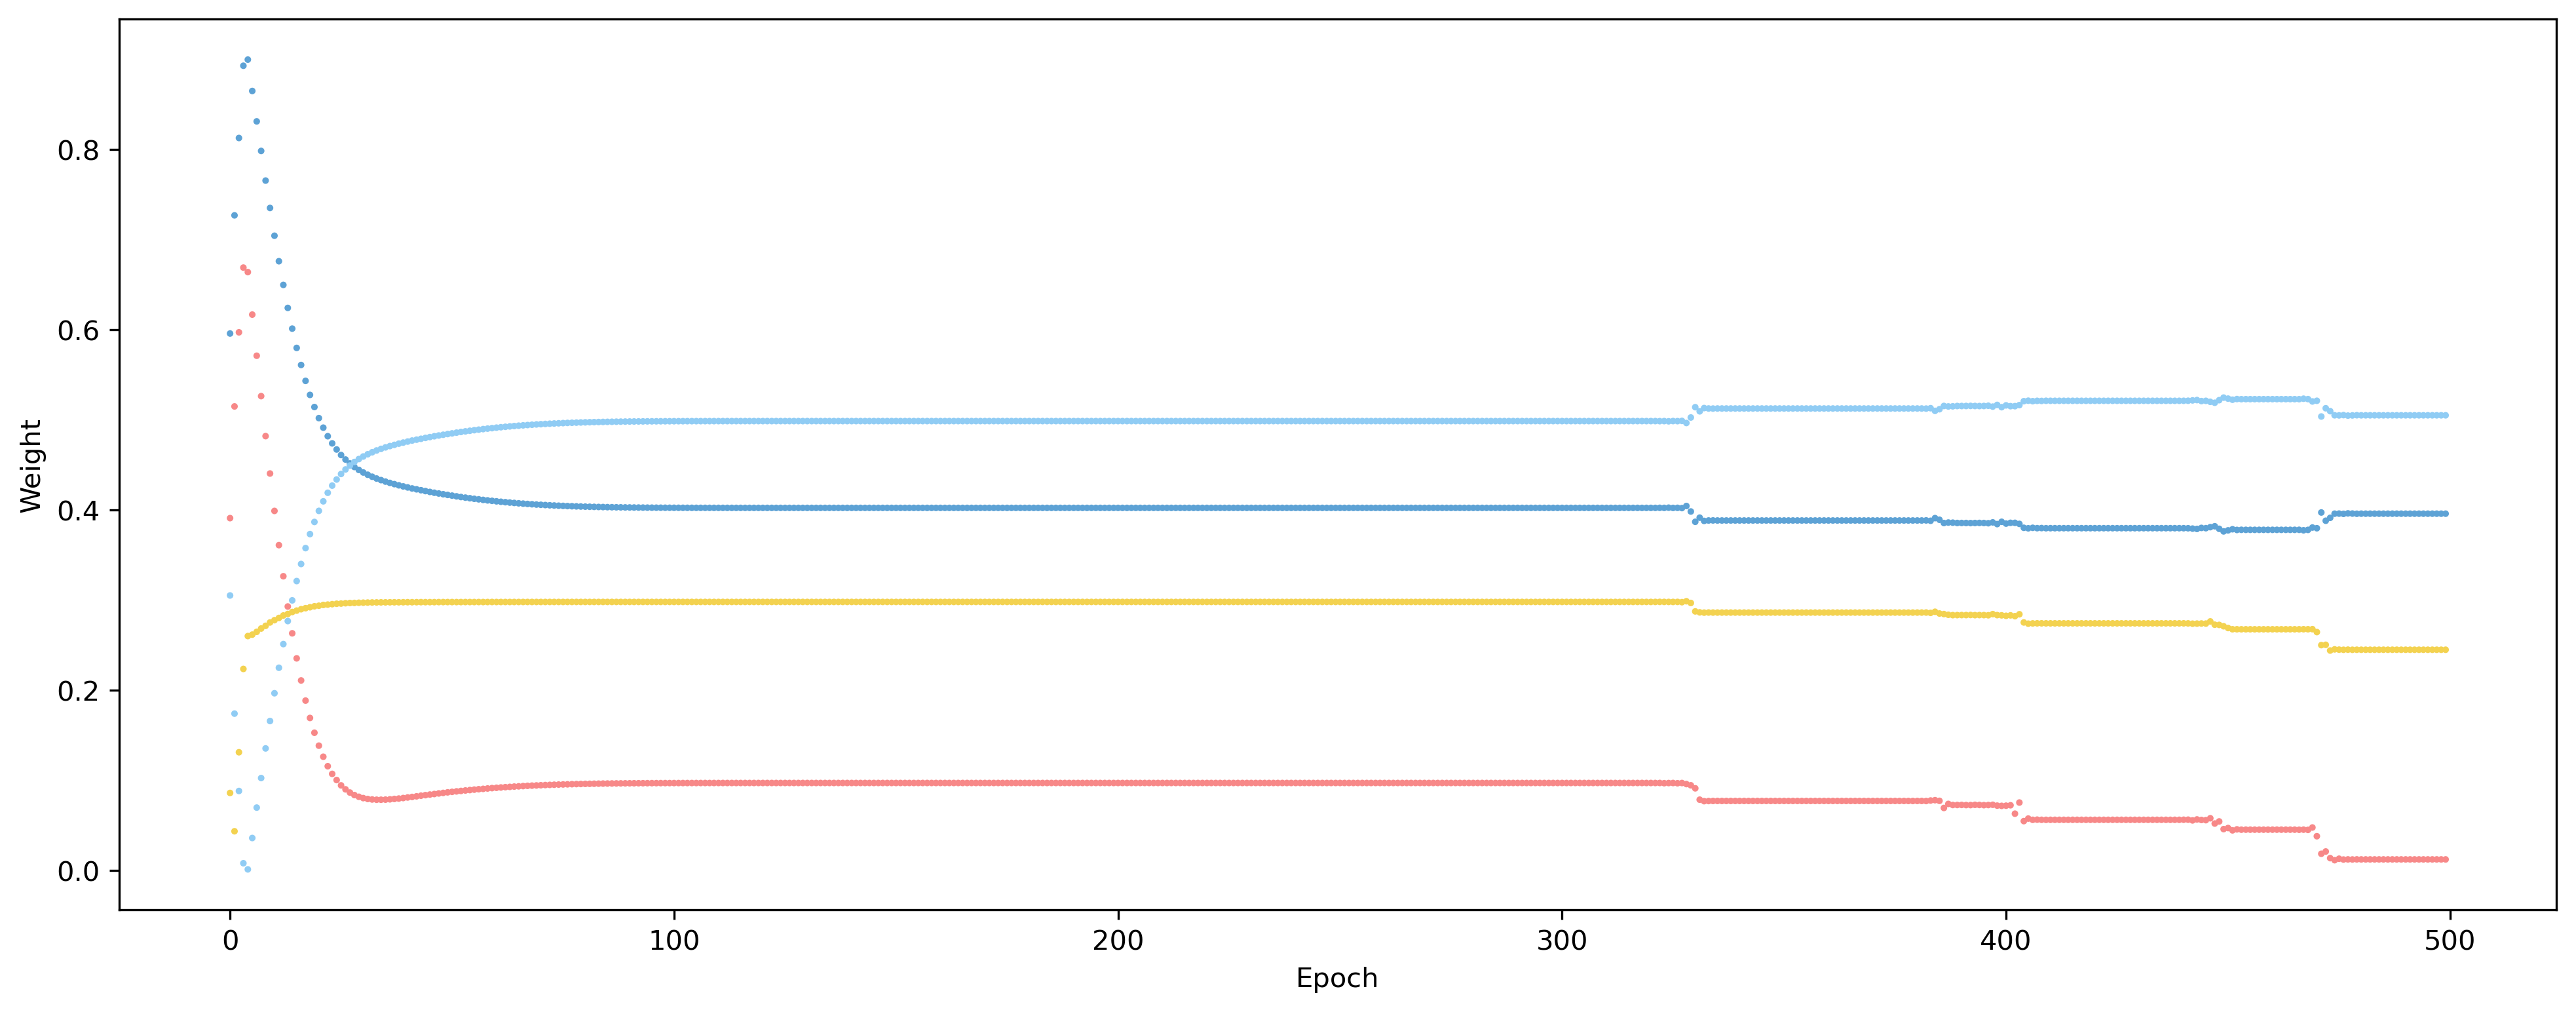

In [71]:
group_threes = [data["m_three"], data["x_three"], data["c_three"], data["noise_three"]]
sdf = call_prepare_scatter_df(group_threes, True)
create_scatter(sdf)

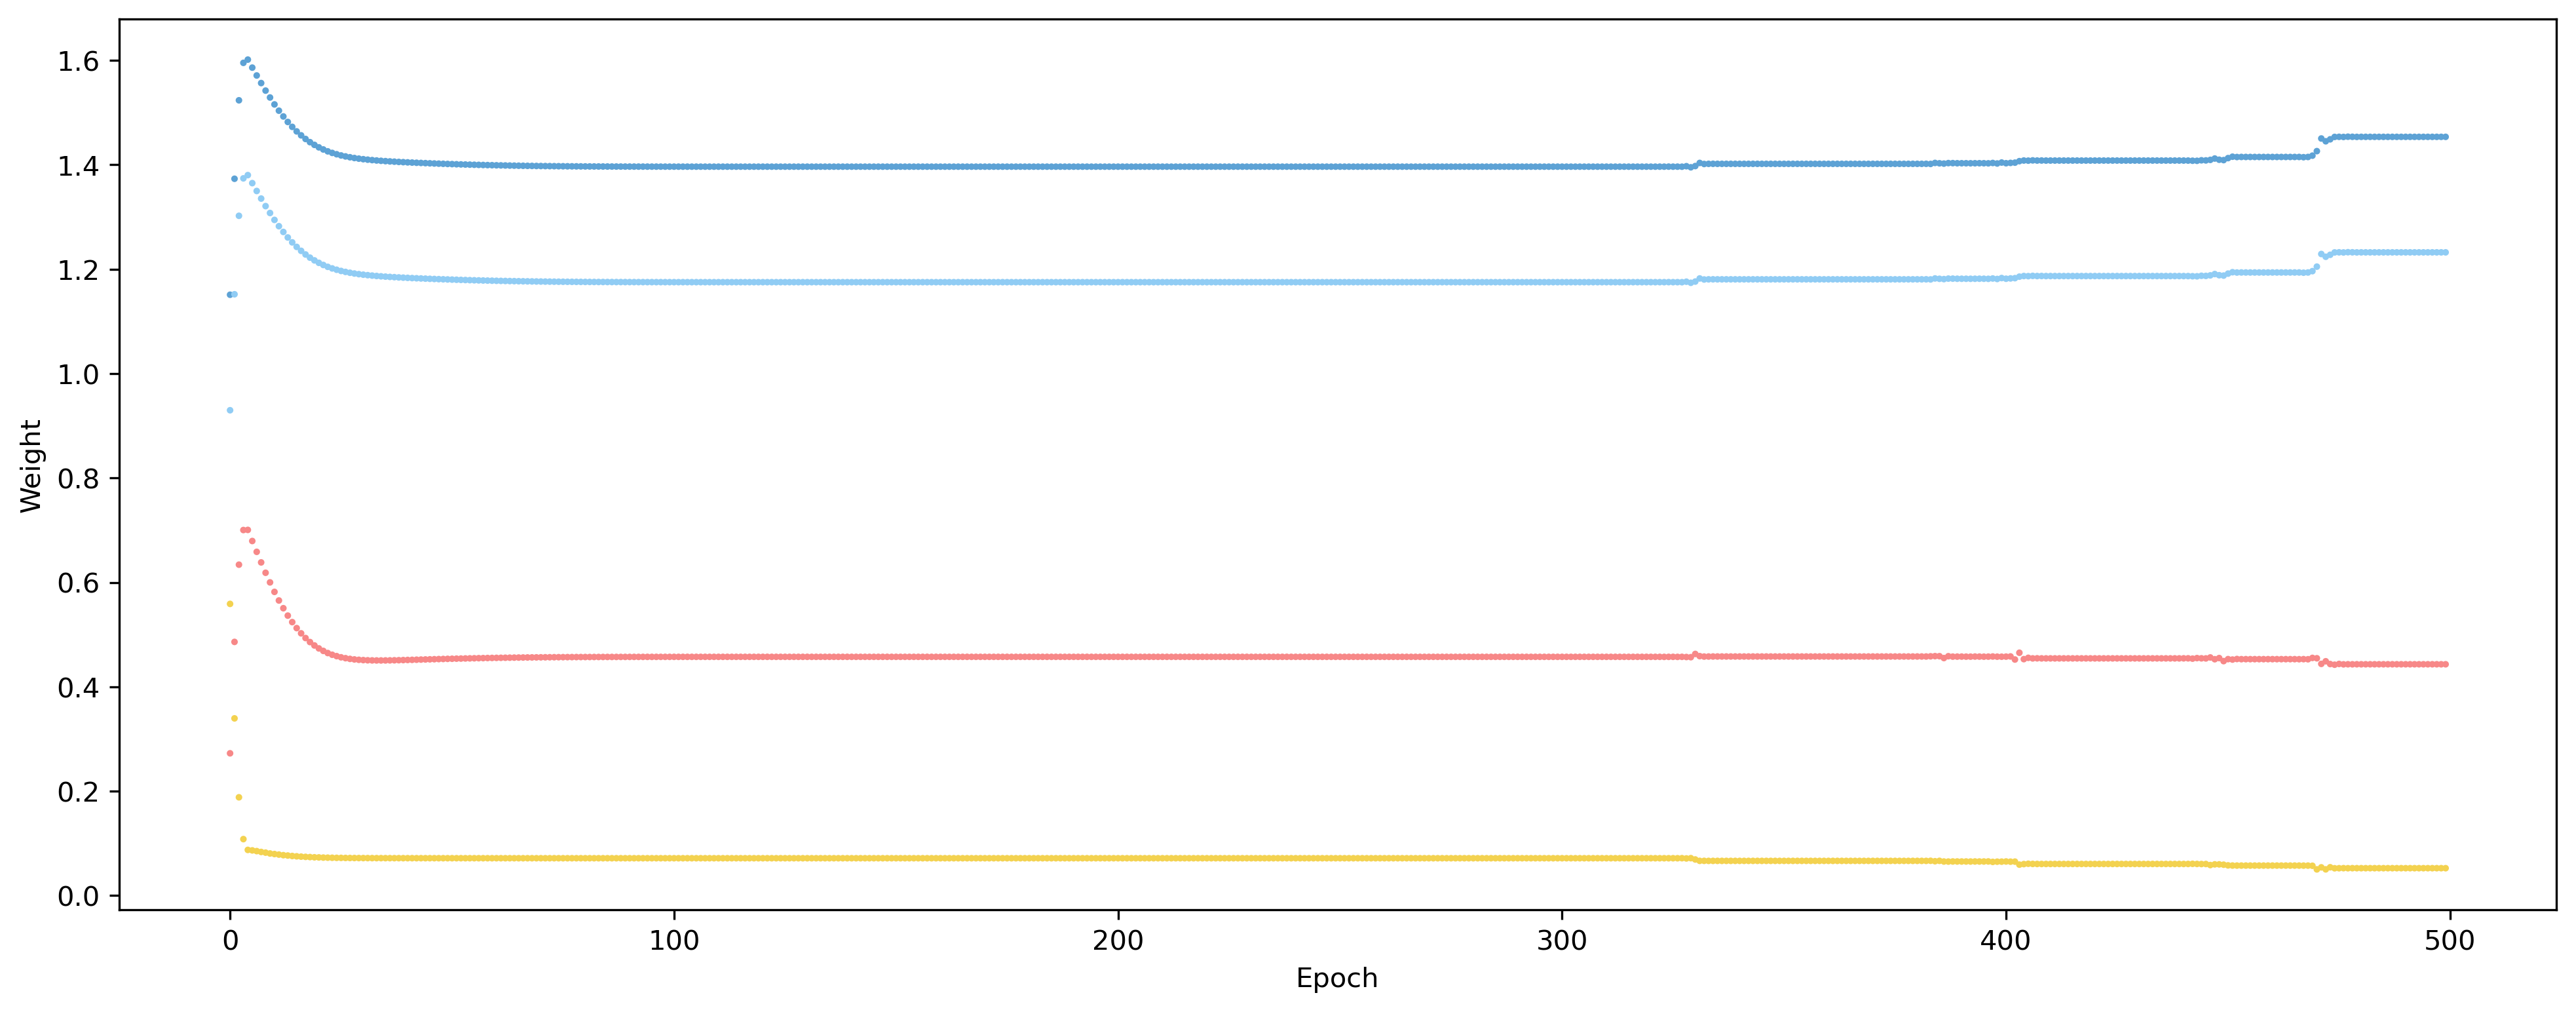

In [72]:
group_fours = [data["m_four"], data["x_four"], data["c_four"], data["noise_four"]]
sdf = call_prepare_scatter_df(group_fours, True)
create_scatter(sdf)

### Plotting Standard Deviations

In [73]:
import math
def plot_stds(group):
    fig, ax = plt.subplots(figsize=(16,6))
    domain = np.linspace(-2,2,1000)
    means = [mean(group[0]), mean(group[1]), mean(group[2]), mean(group[3])]
    stds = [stdev(group[0]), stdev(group[1]), stdev(group[2]), stdev(group[3])]
    colors = [darker, important, light, noise]

    for mu, std, color in zip(means, stds, colors):
        probs = norm.pdf(domain, mu, std)
        ax.plot(domain, probs, color=color)
        ax.set_xlabel("Weight")
        ax.set_ylabel("Probability Density")

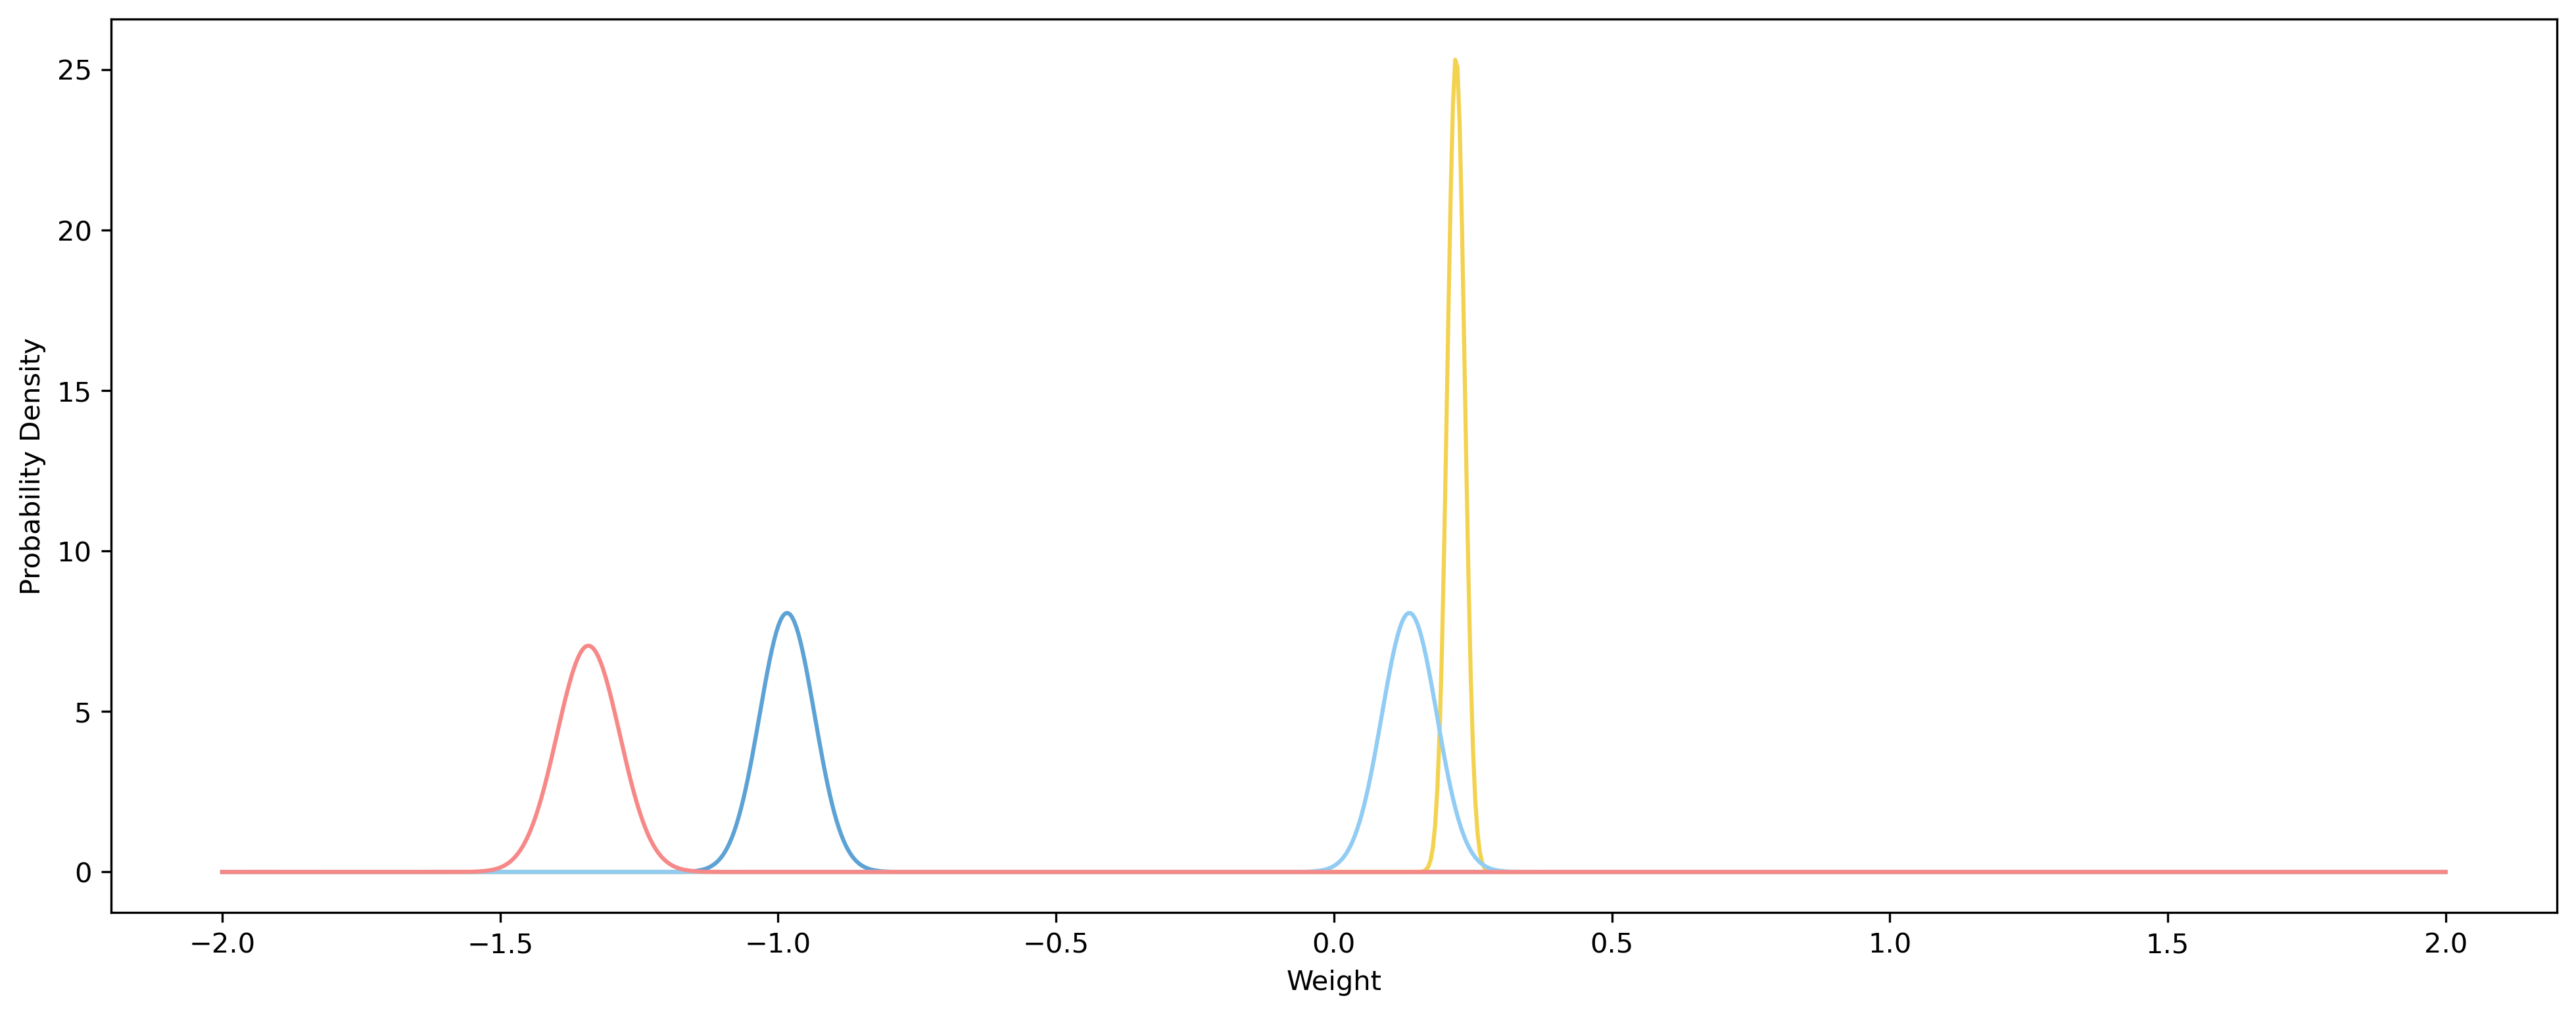

In [74]:
plot_stds(group_ones)

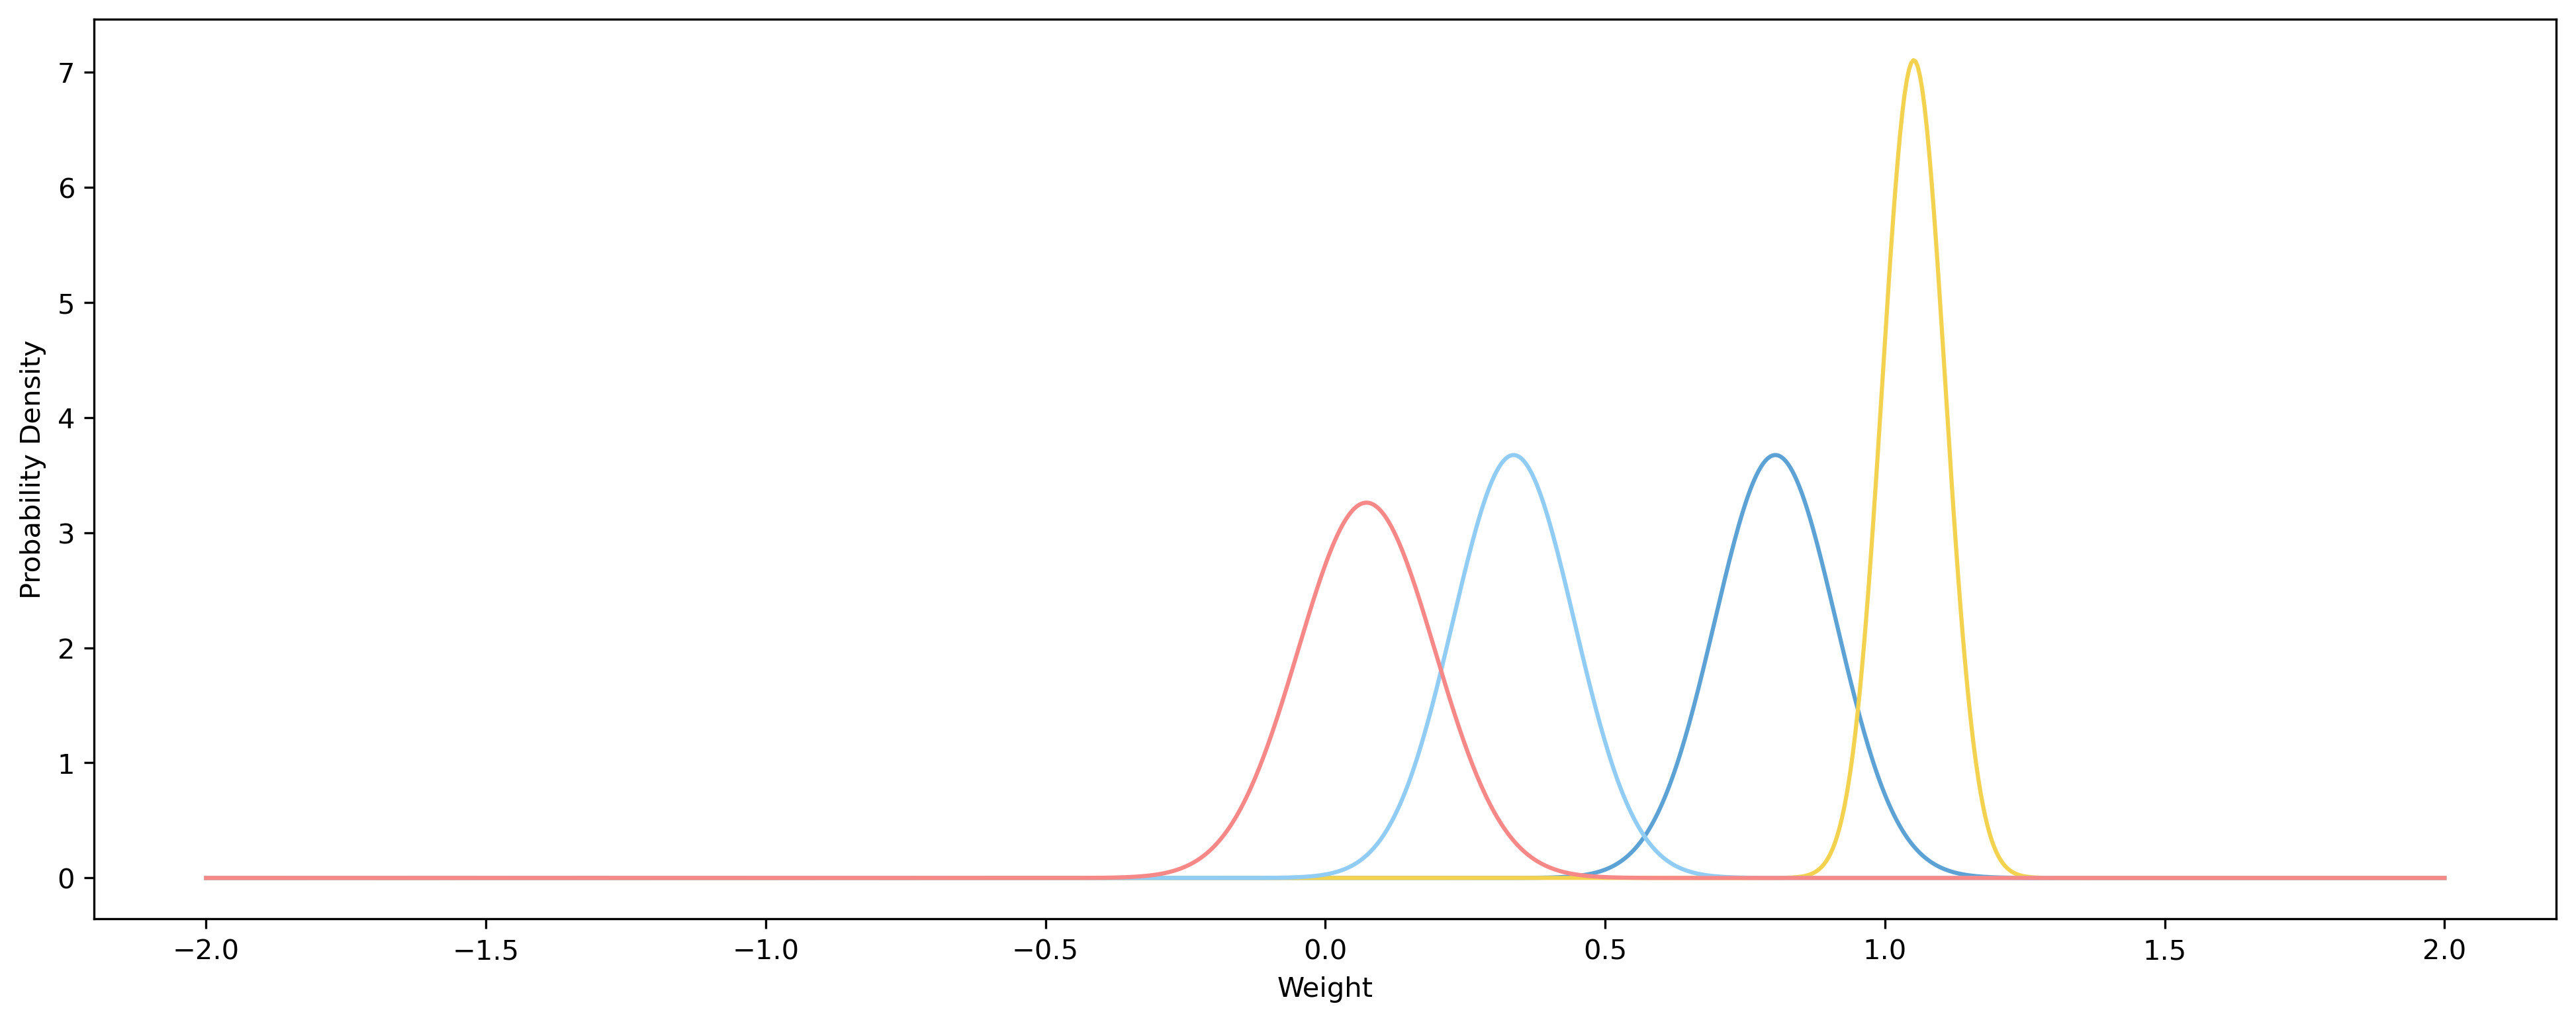

In [75]:
plot_stds(group_twos)

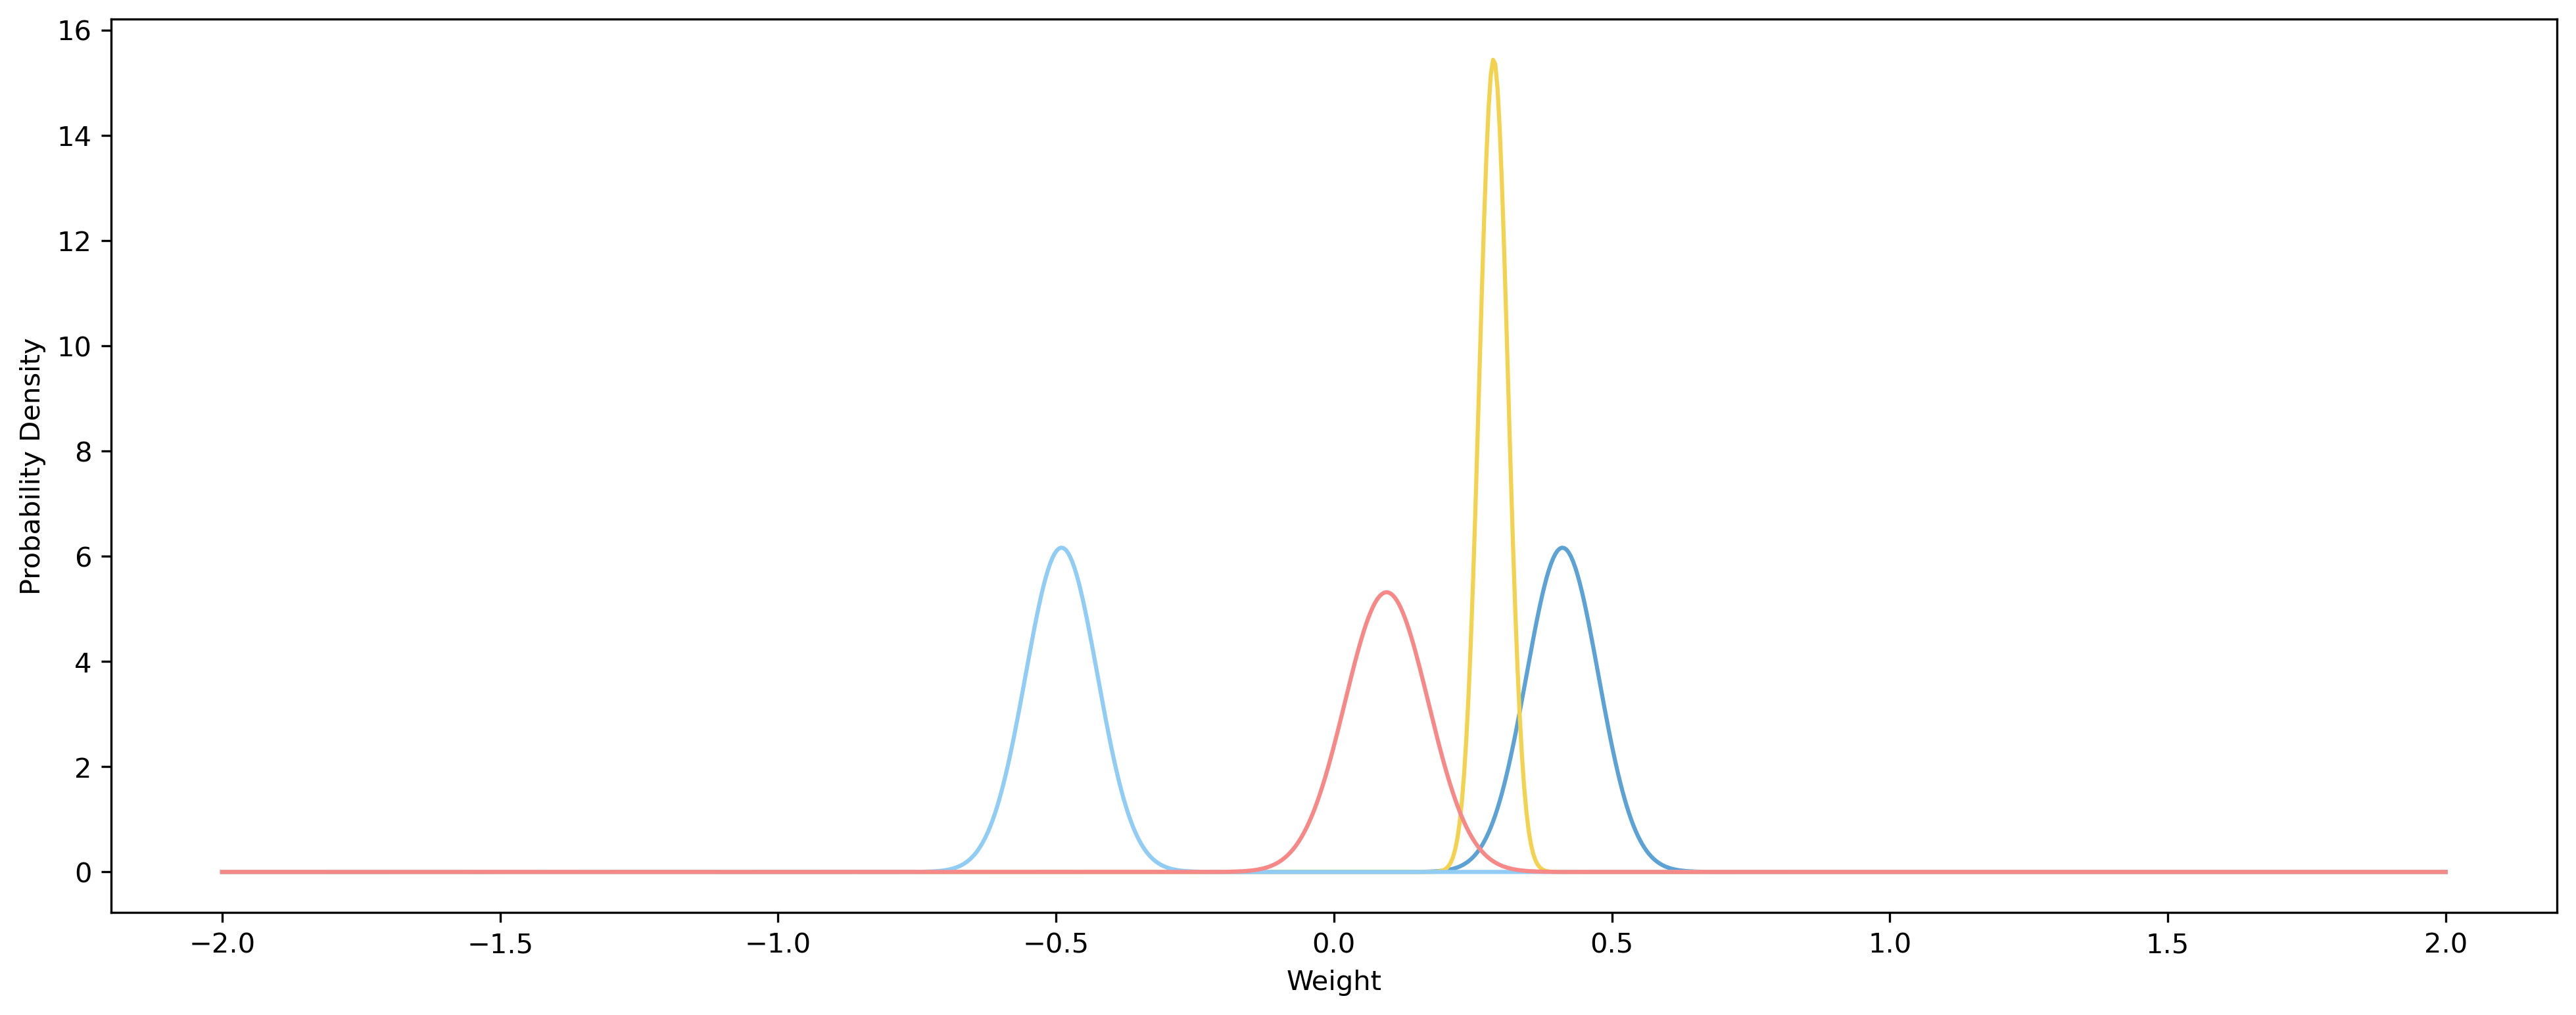

In [76]:
plot_stds(group_threes)

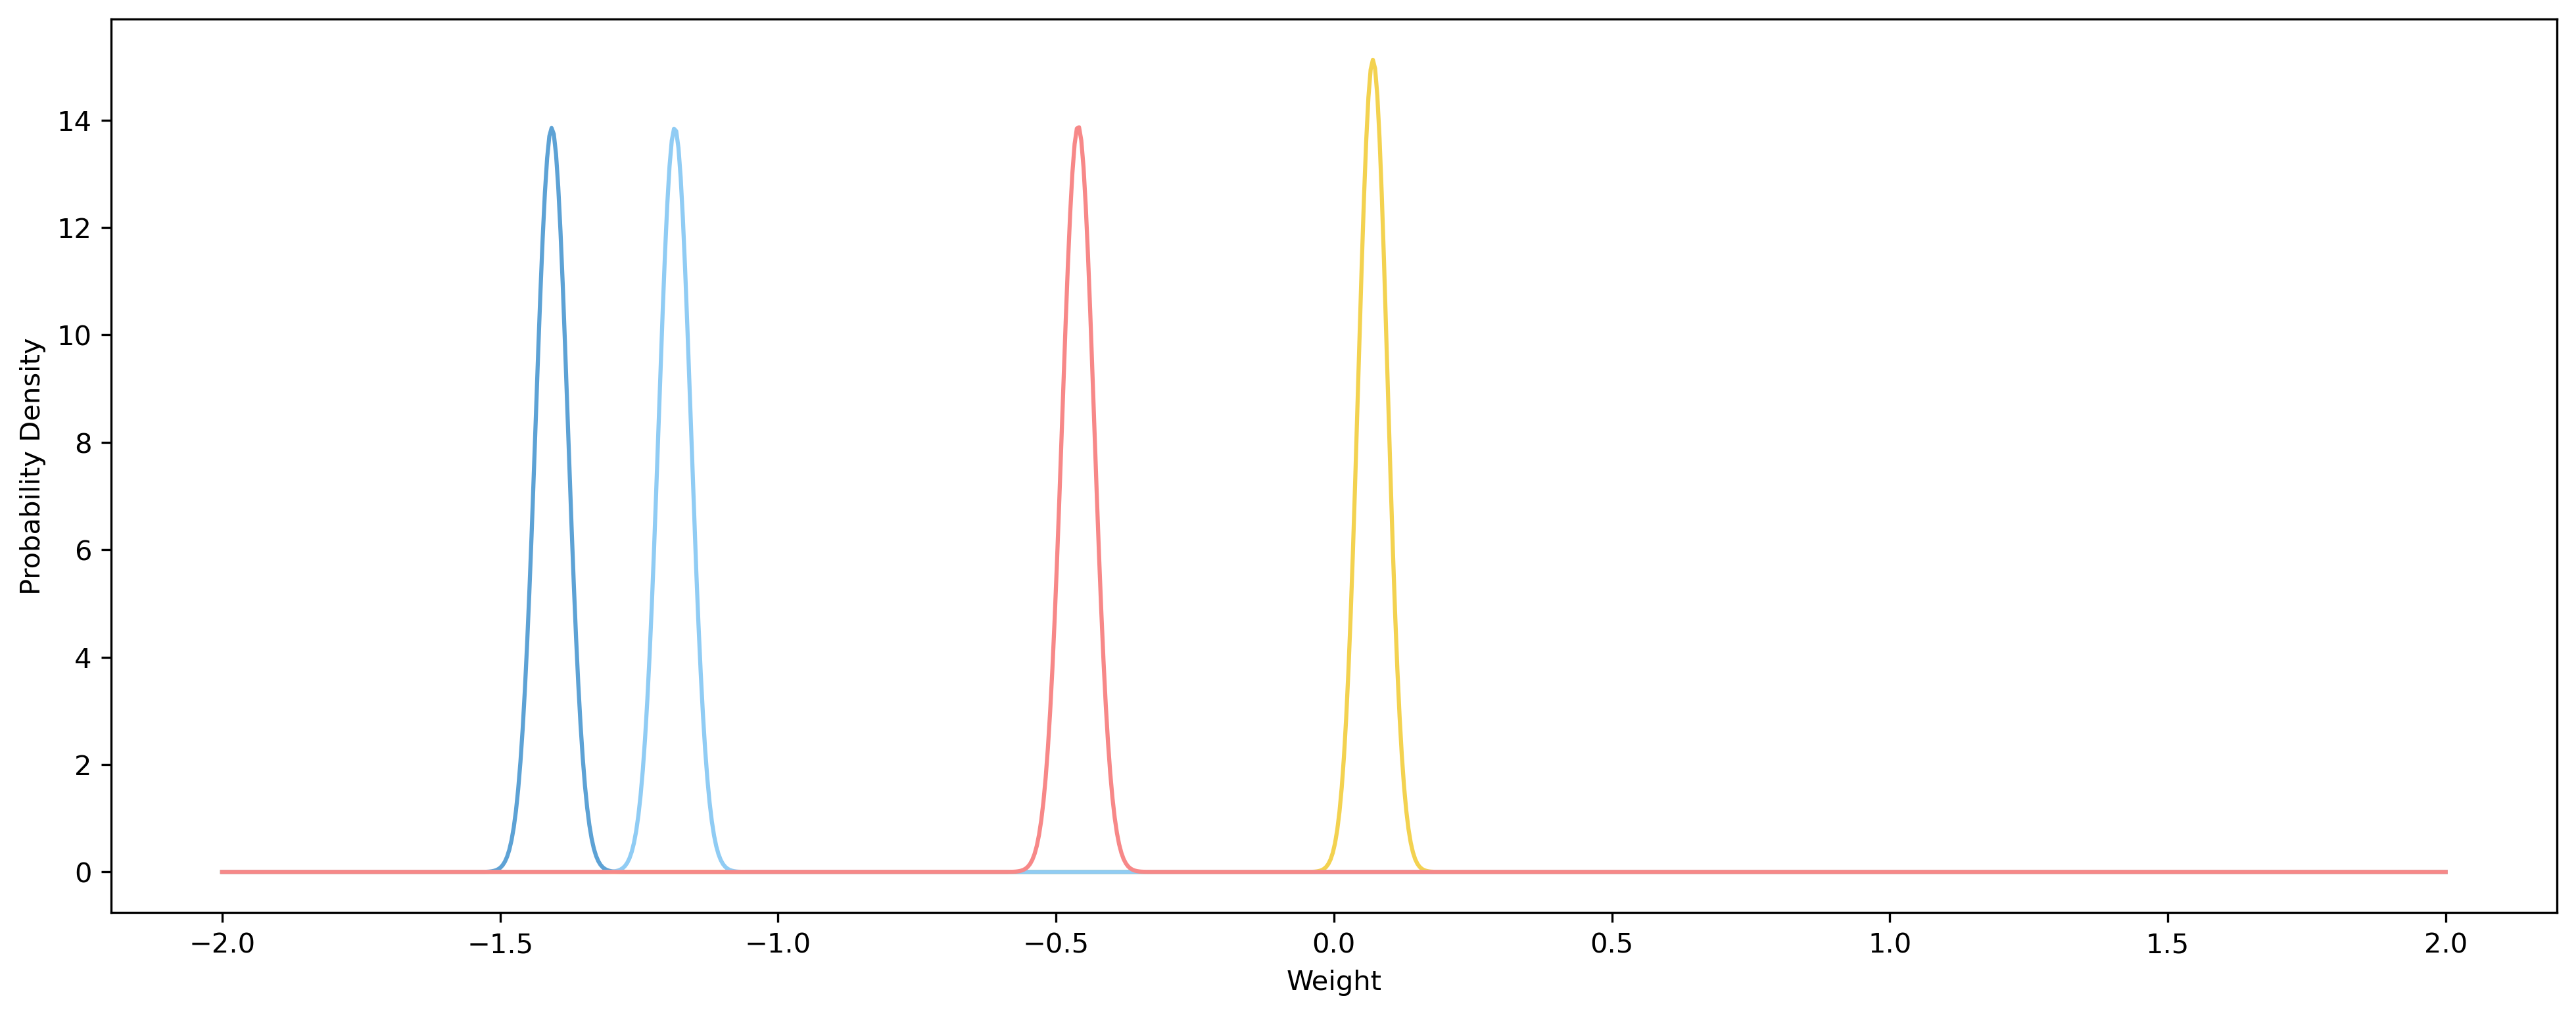

In [77]:
plot_stds(group_fours)

In [92]:
def get_props(group):
    domain = np.linspace(-2,2,1000)
    means = [mean(group[0]), mean(group[1]), mean(group[2]), mean(group[3])]
    stds = [stdev(group[0]), stdev(group[1]), stdev(group[2]), stdev(group[3])]
    results = []
    for mu, std in zip(means, stds):
        values = []
        probs = norm.pdf(domain, mu, std)
        for prob in probs:
            if math.floor(prob) != 0:
                values.append(prob)
        results.append(values)
    return results

In [5]:
groups = [group_ones, group_twos, group_threes, group_fours]
all_probs = [get_props(group) for group in groups]

NameError: name 'group_ones' is not defined

In [94]:
def barrage(all_prob, nodes: int):
    res = {i: {"len": 0, "max": 0, "sum": 0, "mean": 0, "stdev": 0} for i in range(nodes)}
    for probs in all_probs:
        for i, prob in enumerate(probs):
            res[i]["len"] += len(prob)
            res[i]["max"] += max(prob)
            res[i]["sum"] += sum(prob)
            res[i]["mean"] += mean(prob)
            res[i]["stdev"] += stdev(prob)
    return res

In [95]:
res = barrage(all_probs, 4)
res

{0: {'len': 179,
  'max': 41.93730331736271,
  'sum': 964.6786612482588,
  'mean': 23.320852711962157,
  'stdev': 13.048429533893144},
 1: {'len': 112,
  'max': 70.97945993665775,
  'sum': 982.1005316598871,
  'mean': 36.32785022686721,
  'stdev': 23.562144649559315},
 2: {'len': 177,
  'max': 41.90609557867863,
  'sum': 962.6174101272226,
  'mean': 23.439076784146682,
  'stdev': 12.991852976297203},
 3: {'len': 191,
  'max': 40.093998695706766,
  'sum': 959.9611068687511,
  'mean': 22.439839403066888,
  'stdev': 12.424357770095302}}